# Data Cleaning/Preparation for Analysis

I want to analyze different aspects of each document, such as time, location, etc. To do this, I will need to do some data cleaning and extraction.

In [3]:
import pandas as pd
import numpy as np
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re
from collections import Counter

#### Extracting dates

In [3]:
abstracts_df = pd.read_csv('/Users/sunnajo/Desktop/covid_abstracts_2020.csv')
abstracts_df.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,Korea (South),['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11


In [4]:
df = abstracts_df.copy()
df.shape

(42977, 13)

In [5]:
# Check for missing values
df[df['pub_date'] == '?']

# It looks there are none

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month


In [6]:
# Create new column with 'pub_date' as datetime objects
df['pub_date_dt'] = pd.to_datetime(df['pub_date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42977 entries, 0 to 42976
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pmid            42977 non-null  int64         
 1   title           42977 non-null  object        
 2   authors         42977 non-null  object        
 3   source          42977 non-null  object        
 4   location        42977 non-null  object        
 5   pub_date        42977 non-null  object        
 6   entrez_date     42977 non-null  object        
 7   country         42977 non-null  object        
 8   language        42977 non-null  object        
 9   abstract        42977 non-null  object        
 10  entrez_date_dt  42977 non-null  object        
 11  year            42977 non-null  int64         
 12  month           42977 non-null  int64         
 13  pub_date_dt     41576 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(10)
memory usag

In [ ]:
# Extract month and year from new datetime column
df['pub_month'] = df['pub_date_dt'].dt.month
df['pub_year'] = df['pub_date_dt'].dt.year
df.head()

In [9]:
# Look for any missing/null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42977 entries, 0 to 42976
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pmid            42977 non-null  int64         
 1   title           42977 non-null  object        
 2   authors         42977 non-null  object        
 3   source          42977 non-null  object        
 4   location        42977 non-null  object        
 5   pub_date        42977 non-null  object        
 6   entrez_date     42977 non-null  object        
 7   country         42977 non-null  object        
 8   language        42977 non-null  object        
 9   abstract        42977 non-null  object        
 10  entrez_date_dt  42977 non-null  object        
 11  year            42977 non-null  int64         
 12  month           42977 non-null  int64         
 13  pub_date_dt     41576 non-null  datetime64[ns]
 14  pub_month       41576 non-null  float64       
 15  pu

There are missing values in the 'pub_date_dt' column and corresponding 'month' and 'year' columns. Let's look at these and see how we can fill them in.

In [10]:
df[df['pub_date_dt'].isna()]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year
101,33151191,Incidence of COVID-19 Virus Transmission in Th...,"['Froum SH', 'Froum SJ']",Int J Periodontics Restorative Dent. 2020 Nov/...,?,2020 Nov/Dec,2020/11/06 06:00,United States,['eng'],The World Health Organization (WHO) declared C...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN
163,33149927,Subarachnoid diverticulum associated with feli...,"['Hoey C', 'Nye G', 'Fadda A', 'Bradshaw J', '...",JFMS Open Rep. 2020 Oct 19;6(2):20551169209414...,"['Bristol Veterinary School, University of Bri...",2020 Jul-Dec,2020/11/06 06:00,England,['eng'],Case summary: A 7-month-old Siberian cat was p...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN
178,33149416,Pediatric Dentistry during Coronavirus Disease...,"['Sharma A', 'Jain MB']",Int J Clin Pediatr Dent. 2020 Jul-Aug;13(4):41...,"['Department of Dentistry, Shaheed Hasan Khan ...",2020 Jul-Aug,2020/11/06 06:00,India,['eng'],Coronavirus disease-2019 (COVID-19) pandemic h...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN
179,33149414,Dentistry during and after COVID-19 Pandemic: ...,"['Kochhar AS', 'Bhasin R', 'Kochhar GK', 'Dadl...",Int J Clin Pediatr Dent. 2020 Jul-Aug;13(4):39...,"['Dept. of Dental Surgery, Max Hospital, Gurug...",2020 Jul-Aug,2020/11/06 06:00,India,['eng'],This article is a rumination on the outbreak o...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN
330,33146366,From building regulations and local health rul...,"['Gola M', 'Capasso L', 'Mondoni G', 'Petronio...",Ann Ig. 2020 Sep-Oct;32(5 Supple 1):36-51. doi...,"['Department of Architecture, Built Environmen...",2020 Sep-Oct,2020/11/05 06:00,Italy,['eng'],BACKGROUND: World Health Organization has high...,2020-11-05 06:00:00,2020,11,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42322,32171193,Induction of pro-inflammatory cytokines (IL-1 ...,"['Conti P', 'Ronconi G', 'Caraffa A', 'Galleng...","J Biol Regul Homeost Agents. 2020 March-April,...","['Postgraduate Medical School, University of C...","2020 March-April,",2020/03/17 06:00,Italy,['eng'],Coronavirus-19 (COVI-19) involves humans as we...,2020-03-17 06:00:00,2020,3,NaT,NaN,NaN
42363,32165283,COVID-19 - the role of mass gatherings.,"['Ebrahim SH', 'Memish ZA']",Travel Med Infect Dis. 2020 Mar - Apr;34:10161...,"['University of Sciences, Technique and Techno...",2020 Mar - Apr,2020/03/14 06:00,Netherlands,['eng'],Mass gathering (MG) medicine emerged against t...,2020-03-14 06:00:00,2020,3,NaT,NaN,NaN
42829,32036011,"Coronavirus infections reported by ProMED, Feb...","['Bonilla-Aldana DK', 'Holguin-Rivera Y', 'Cor...",Travel Med Infect Dis. 2020 May - Jun;35:10157...,"['Incubator in Zoonosis (SIZOO), Biodiversity ...",2020 May - Jun,2020/02/10 06:00,Netherlands,['eng'],INTRODUCTION: Sources describing the global bu...,2020-02-10 06:00:00,2020,2,NaT,NaN,NaN
42882,32013309,Mast cells contribute to coronavirus-induced i...,"['Kritas SK', 'Ronconi G', 'Caraffa A', 'Galle...",J Biol Regul Homeost Agents. 2020 January-Febr...,['Department of Microbiology and Infectious Di...,"2020 January-February,",2020/02/06 06:00,Italy,['eng'],Coronavirus can cause respiratory syndrome whi...,2020-02-06 06:00:00,2020,2,NaT,NaN,NaN


It looks like I was unable to convert the dates because of formatting. I will extract the month by mapping to a list/dictionary containing the names of the months.

In [12]:
# Work only with the rows where 'pub_date_dt' is null
no_pub_date_idx = [idx for idx, row in df[df['pub_date_dt'].isna()].iterrows()]
len(no_pub_date_idx)

1401

In [15]:
# Read in text file with month names and abbreviations
text_file = open("/Users/sunnajo/Desktop/months.txt", "r")
months = text_file.read()
text_file.close()

# Convert each text file to list
months_l = months.split('\n')
months_l

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Sept',
 'Oct',
 'Nov',
 'Dec']

In [16]:
# Create function to extract month
import string

def get_month(idx):
    pd = df.loc[idx,'pub_date']
    
    # Clean and parse text
    cleaned = re.sub('[%s]' % re.escape(string.punctuation), ' ', pd)
    cleaned = cleaned.split(' ')

    # Find intersection of lists
    if any(item in cleaned for item in months_l):
        months_d[idx] = list(set(cleaned) & set(months_l))[0]
    else:
        months_d[idx] = np.nan

In [18]:
# Create months dictionary
months_d = {}
for idx in no_pub_date_idx:
    get_month(idx)
    
len(months_d)

1401

In [19]:
# Convert dictionary to pandas Series and append to dataframe, then fill null values
months_s = pd.Series(months_d)
df2 = pd.concat([df, months_s], axis=1)
df2.iloc[no_pub_date_idx].head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,0
101,33151191,Incidence of COVID-19 Virus Transmission in Th...,"['Froum SH', 'Froum SJ']",Int J Periodontics Restorative Dent. 2020 Nov/...,?,2020 Nov/Dec,2020/11/06 06:00,United States,['eng'],The World Health Organization (WHO) declared C...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN,Nov
163,33149927,Subarachnoid diverticulum associated with feli...,"['Hoey C', 'Nye G', 'Fadda A', 'Bradshaw J', '...",JFMS Open Rep. 2020 Oct 19;6(2):20551169209414...,"['Bristol Veterinary School, University of Bri...",2020 Jul-Dec,2020/11/06 06:00,England,['eng'],Case summary: A 7-month-old Siberian cat was p...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN,Jul
178,33149416,Pediatric Dentistry during Coronavirus Disease...,"['Sharma A', 'Jain MB']",Int J Clin Pediatr Dent. 2020 Jul-Aug;13(4):41...,"['Department of Dentistry, Shaheed Hasan Khan ...",2020 Jul-Aug,2020/11/06 06:00,India,['eng'],Coronavirus disease-2019 (COVID-19) pandemic h...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN,Jul
179,33149414,Dentistry during and after COVID-19 Pandemic: ...,"['Kochhar AS', 'Bhasin R', 'Kochhar GK', 'Dadl...",Int J Clin Pediatr Dent. 2020 Jul-Aug;13(4):39...,"['Dept. of Dental Surgery, Max Hospital, Gurug...",2020 Jul-Aug,2020/11/06 06:00,India,['eng'],This article is a rumination on the outbreak o...,2020-11-06 06:00:00,2020,11,NaT,NaN,NaN,Jul
330,33146366,From building regulations and local health rul...,"['Gola M', 'Capasso L', 'Mondoni G', 'Petronio...",Ann Ig. 2020 Sep-Oct;32(5 Supple 1):36-51. doi...,"['Department of Architecture, Built Environmen...",2020 Sep-Oct,2020/11/05 06:00,Italy,['eng'],BACKGROUND: World Health Organization has high...,2020-11-05 06:00:00,2020,11,NaT,NaN,NaN,Sep


In [20]:
df2.rename(columns={0: 'pub_month2'}, inplace=True)
df2['pub_month'].fillna(df2['pub_month2'], inplace=True)
df2['pub_month'].isna().sum()

81

In [21]:
df2[df2['pub_month'].isna()]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2
2312,33108884,The first cancer patient with COVID-19 in Slov...,"['Jan S', 'Tomas S', 'Natalia P', 'Eva Z', 'Ma...",Klin Onkol. 2020 Spring;33(5):386-389. doi: 10...,?,2020 Spring,2020/10/29 06:00,Czech Republic,['eng'],BACKGROUND: In December 2019 a new strain of c...,2020-10-29 06:00:00,2020,10,NaT,NaN,NaN,NaN
3169,33094214,COVID-19 Pandemic and Neurological Disease: A ...,['Assari S'],Hosp Pract Res. 2020 Summer;5(3):81-86.,"['Department of Family Medicine, Charles R. Dr...",2020 Summer,2020/10/24 06:00,Iran,['eng'],Most of what we know about the coronavirus dis...,2020-10-24 06:00:00,2020,10,NaT,NaN,NaN,NaN
3171,33094132,Longitudinal Quantitative Analysis of Radiatio...,"['Hasan S', 'Press RH', 'Chhabra A', 'Choi JI'...",Int J Part Ther. 2020 Aug 3;7(1):21-27. doi: 1...,"['New York Proton Center, New York, NY, USA.',...",2020 Summer,2020/10/24 06:00,United States,['eng'],Purpose: The novel coronavirus (COVID-19) forc...,2020-10-24 06:00:00,2020,10,NaT,NaN,NaN,NaN
3572,33086857,The duration of SARS-CoV-2 shedding in patient...,"['Cimrman S', 'Mackova L', 'Kral V', 'Bartos H...",Epidemiol Mikrobiol Imunol. 2020 Summer;69(3):...,?,2020 Summer,2020/10/23 06:00,Czech Republic,['eng'],The knowledge of SARS-CoV-2 (severe acute resp...,2020-10-23 06:00:00,2020,10,NaT,NaN,NaN,NaN
4440,33071674,Spontaneous Pneumothorax in an Elderly Patient...,"['Rehman T', 'Josephson G', 'Sunbuli M', 'Chad...",Ochsner J. 2020 Fall;20(3):343-345. doi: 10.31...,"['Internal Medicine Residency, University of I...",2020 Fall,2020/10/20 06:00,United States,['eng'],Background: The relationship between the 2019 ...,2020-10-20 06:00:00,2020,10,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40422,32303026,Impact of Human Disasters and COVID-19 Pandemi...,"['Cosic K', 'Popovic S', 'Sarlija M', 'Kesedzi...",Psychiatr Danub. 2020 Spring;32(1):25-31. doi:...,['Laboratory for Interactive Simulation System...,2020 Spring,2020/04/18 06:00,Croatia,['eng'],Deep emotional traumas in societies overwhelme...,2020-04-18 06:00:00,2020,4,NaT,NaN,NaN,NaN
40423,32303025,Crisis Psychodrama in the Era of COVID-19.,"['Mindoljevic Drakulic A', 'Radman V']",Psychiatr Danub. 2020 Spring;32(1):22-24. doi:...,"['Faculty of Humanities and Social Sciences, L...",2020 Spring,2020/04/18 06:00,Croatia,['eng'],This work gives an overview of the methods of ...,2020-04-18 06:00:00,2020,4,NaT,NaN,NaN,NaN
40424,32303024,The Importance of Psychodynamic Approach durin...,"['Marcinko D', 'Jakovljevic M', 'Jaksic N', 'B...",Psychiatr Danub. 2020 Spring;32(1):15-21. doi:...,['Department of Psychiatry and Psychological M...,2020 Spring,2020/04/18 06:00,Croatia,['eng'],The coronavirus (COVID-19) outbreak was labele...,2020-04-18 06:00:00,2020,4,NaT,NaN,NaN,NaN
40425,32303023,COVID-19 Pandemia and Public and Global Mental...,"['Jakovljevic M', 'Bjedov S', 'Jaksic N', 'Jak...",Psychiatr Danub. 2020 Spring;32(1):6-14. doi: ...,['Department of Psychiatry and Psychological M...,2020 Spring,2020/04/18 06:00,Croatia,['eng'],The Coronavirus disease 2019 (COVID-19) pandem...,2020-04-18 06:00:00,2020,4,NaT,NaN,NaN,NaN


We still have some missing values for the 'month' column. It looks like this is because the publish date does not specify the month. For these, we will use the Entrez/database month.

In [24]:
df2['pub_month'].fillna(df2['month'], inplace=True)
df2['pub_month'].isna().sum()

0

We have now taken care of all missing values in the 'month' column. Let's now check these values to make sure there are no errors.

In [25]:
# Year column: convert floats to integer values
df2['year'] = df2['year'].astype(int)
df2['year'].value_counts()

2020    42977
Name: year, dtype: int64

In [26]:
# Look at pub_month column
df2['pub_month'].value_counts()

10.0        7141
9.0         6763
8.0         6044
7.0         5414
6.0         4263
1.0         4091
5.0         2806
11.0        2114
4.0         1437
12.0         748
3.0          570
Jul          421
Sep          273
2.0          266
Jun          223
Jan          150
Nov           78
Oct           66
Apr           52
May           25
Feb           13
Mar           13
April          3
Sept           2
February       1
Name: pub_month, dtype: int64

In [28]:
# Map spelled out months to integers
df2['pub_month'].replace({'Jan': 1, 'January': 1, 'Feb': 2, 'February': 2, 'Mar': 3, 'Apr': 4, 'April': 4, 'May': 5, 'Jun': 6, 'June': 6, 'Jul': 7, 'Aug': 8,
                     'Sep': 9, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}, inplace=True)
df2['pub_month'].value_counts()

10.0    7207
9.0     7038
8.0     6044
7.0     5835
6.0     4486
1.0     4241
5.0     2831
11.0    2192
4.0     1492
12.0     748
3.0      583
2.0      280
Name: pub_month, dtype: int64

In [30]:
# Convert 'pub_month' column to integer type
df2['pub_month'] = df2['pub_month'].astype(int)
df2['pub_month'].value_counts()

10    7207
9     7038
8     6044
7     5835
6     4486
1     4241
5     2831
11    2192
4     1492
12     748
3      583
2      280
Name: pub_month, dtype: int64

In [31]:
# Save df
compression_opts = dict(method='zip', archive_name='abstracts_df_cleaned.csv')  
df2.to_csv(r'/Users/sunnajo/Desktop/abstracts_df_cleaned.zip', index=False, compression=compression_opts)

#### **Extracting location**

#### Journal country

We were able to get the countries for the journals in which each abstract was published from the data query/collection process. Let's look at this column to check for missing/null values, etc.

In [32]:
# Check for missing values
df2['country'].isna().sum()

0

In [33]:
df2[df2['country'] == '?']

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2
2629,33103121,Early Detection of Covid-19 in Canadian Provin...,"['Kamboj VK', 'Verma C', 'Gupta A']",SN Comput Sci. 2020;1(6):349. doi: 10.1007/s42...,['Department of Electrical and Computer Engine...,2020,2020/10/27 06:00,?,['eng'],The spread of COVID-19 is incearsing day by da...,2020-10-27 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
2806,33100737,Sugar Futures as an Investment Alternative Dur...,"['Babirath J', 'Malec K', 'Schmitl R', 'Sahatq...",Sugar Tech. 2020 Oct 16:1-12. doi: 10.1007/s12...,['University of Applied Sciences in Eisenstadt...,2020 Oct 16,2020/10/27 06:00,?,['eng'],"In times of turbulent financial markets, inves...",2020-10-27 06:00:00,2020,10,2020-10-16,10,2020.0,NaN
3146,33094291,Luminespib counteracts the Kifunensine-induced...,"['Kubra KT', 'Uddin MA', 'Akhter MS', 'Barabut...",Curr Res Toxicol. 2020 Jun 10;1:111-115. doi: ...,['School of Basic Pharmaceutical and Toxicolog...,2020 Jun 10,2020/10/24 06:00,?,['eng'],Unfolded protein response (UPR) suppression by...,2020-10-24 06:00:00,2020,10,2020-06-10,6,2020.0,NaN
3513,33088026,Globalization and global risk: How risk analys...,"['Aven T', 'Zio E']",Reliab Eng Syst Saf. 2021 Jan;205:107270. doi:...,"['University of Stavanger, Norway.', 'MINES Pa...",2021 Jan,2020/10/23 06:00,?,['eng'],"In the last 20-30 years, technological innovat...",2020-10-23 06:00:00,2020,10,2021-01-01,1,2021.0,NaN
4927,33063058,Wearable Technology to Assist the Patients Inf...,"['Islam MM', 'Mahmud S', 'Muhammad LJ', 'Islam...",SN Comput Sci. 2020;1(6):320. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,?,['eng'],Wearable technology plays a significant role i...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4928,33063056,COVID-19 Pandemic: ARIMA and Regression Model-...,"['Chaurasia V', 'Pal S']",SN Comput Sci. 2020;1(5):288. doi: 10.1007/s42...,"['Department of Computer Applications, VBS Pur...",2020,2020/10/17 06:00,?,['eng'],COVID-19 has now taken a frightening form. As ...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4929,33063054,A Study on Fight Against COVID-19 from Latest ...,"['Arulprakash E', 'Aruldoss M']",SN Comput Sci. 2020;1(5):277. doi: 10.1007/s42...,"['Department of Computer Science, CUTN, Thiruv...",2020,2020/10/17 06:00,?,['eng'],Uncontrolled spread of pandemic COVID-19 in In...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4930,33063053,Breathing Aid Devices to Support Novel Coronav...,"['Islam MM', 'Ullah SMA', 'Mahmud S', 'Raju SM...",SN Comput Sci. 2020;1(5):274. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,?,['eng'],"Novel coronavirus (COVID-19), an ongoing pande...",2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4931,33063052,A Smartphone Enabled Approach to Manage COVID-...,"['Maghdid HS', 'Ghafoor KZ']",SN Comput Sci. 2020;1(5):271. doi: 10.1007/s42...,"['Department of Software Engineering, Faculty ...",2020,2020/10/17 06:00,?,['eng'],The emergence of novel COVID-19 causes an over...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4932,33063049,Predictive Data Mining Models for Novel Corona...,"['Muhammad LJ', 'Islam MM', 'Usman SS', 'Ayon ...",SN Comput Sci. 2020;1(4):206. doi: 10.1007/s42...,['Department of Mathematics and Computer Scien...,2020,2020/10/17 06:00,?,['eng'],Novel coronavirus (COVID-19 or 2019-nCoV) pand...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN


It looks like there are a few entries with missing country information. We will try to fill these in by extracting information from the 'location' column using GeoText.

In [34]:
from geotext import GeoText

In [36]:
# Function to extract country
def get_country(idx):
    location = df.loc[idx,'location']
    places = GeoText(location)
    country_d[idx] = list(places.country_mentions)[0]

In [37]:
# Indices of rows with missing country values
no_country_idx = [idx for idx, row in df2[df2['country'] == '?'].iterrows()]

# Create dictionary to map indices to extracted country names
country_d = {}
for idx in no_country_idx:
    get_country(idx)

# Convert dictionary to pandas Series and append to dataframe
country_s = pd.Series(country_d)
df2 = pd.concat([df2, country_s], axis=1)
df2.rename(columns={0: 'country2'}, inplace=True)
df2.iloc[no_country_idx]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,country2
2629,33103121,Early Detection of Covid-19 in Canadian Provin...,"['Kamboj VK', 'Verma C', 'Gupta A']",SN Comput Sci. 2020;1(6):349. doi: 10.1007/s42...,['Department of Electrical and Computer Engine...,2020,2020/10/27 06:00,?,['eng'],The spread of COVID-19 is incearsing day by da...,2020-10-27 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,CA
2806,33100737,Sugar Futures as an Investment Alternative Dur...,"['Babirath J', 'Malec K', 'Schmitl R', 'Sahatq...",Sugar Tech. 2020 Oct 16:1-12. doi: 10.1007/s12...,['University of Applied Sciences in Eisenstadt...,2020 Oct 16,2020/10/27 06:00,?,['eng'],"In times of turbulent financial markets, inves...",2020-10-27 06:00:00,2020,10,2020-10-16,10,2020.0,NaN,CZ
3146,33094291,Luminespib counteracts the Kifunensine-induced...,"['Kubra KT', 'Uddin MA', 'Akhter MS', 'Barabut...",Curr Res Toxicol. 2020 Jun 10;1:111-115. doi: ...,['School of Basic Pharmaceutical and Toxicolog...,2020 Jun 10,2020/10/24 06:00,?,['eng'],Unfolded protein response (UPR) suppression by...,2020-10-24 06:00:00,2020,10,2020-06-10,6,2020.0,NaN,US
3513,33088026,Globalization and global risk: How risk analys...,"['Aven T', 'Zio E']",Reliab Eng Syst Saf. 2021 Jan;205:107270. doi:...,"['University of Stavanger, Norway.', 'MINES Pa...",2021 Jan,2020/10/23 06:00,?,['eng'],"In the last 20-30 years, technological innovat...",2020-10-23 06:00:00,2020,10,2021-01-01,1,2021.0,NaN,NO
4927,33063058,Wearable Technology to Assist the Patients Inf...,"['Islam MM', 'Mahmud S', 'Muhammad LJ', 'Islam...",SN Comput Sci. 2020;1(6):320. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,?,['eng'],Wearable technology plays a significant role i...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,BD
4928,33063056,COVID-19 Pandemic: ARIMA and Regression Model-...,"['Chaurasia V', 'Pal S']",SN Comput Sci. 2020;1(5):288. doi: 10.1007/s42...,"['Department of Computer Applications, VBS Pur...",2020,2020/10/17 06:00,?,['eng'],COVID-19 has now taken a frightening form. As ...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,IN
4929,33063054,A Study on Fight Against COVID-19 from Latest ...,"['Arulprakash E', 'Aruldoss M']",SN Comput Sci. 2020;1(5):277. doi: 10.1007/s42...,"['Department of Computer Science, CUTN, Thiruv...",2020,2020/10/17 06:00,?,['eng'],Uncontrolled spread of pandemic COVID-19 in In...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,IN
4930,33063053,Breathing Aid Devices to Support Novel Coronav...,"['Islam MM', 'Ullah SMA', 'Mahmud S', 'Raju SM...",SN Comput Sci. 2020;1(5):274. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,?,['eng'],"Novel coronavirus (COVID-19), an ongoing pande...",2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,BD
4931,33063052,A Smartphone Enabled Approach to Manage COVID-...,"['Maghdid HS', 'Ghafoor KZ']",SN Comput Sci. 2020;1(5):271. doi: 10.1007/s42...,"['Department of Software Engineering, Faculty ...",2020,2020/10/17 06:00,?,['eng'],The emergence of novel COVID-19 causes an over...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,IQ
4932,33063049,Predictive Data Mining Models for Novel Corona...,"['Muhammad LJ', 'Islam MM', 'Usman SS', 'Ayon ...",SN Comput Sci. 2020;1(4):206. doi: 10.1007/s42...,['Department of Mathematics and Computer Scien...,2020,2020/10/17 06:00,?,['eng'],Novel coronavirus (COVID-19 or 2019-nCoV) pand...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN,NG


In [38]:
# Replace missing 'country' values
for idx in no_country_idx:
    df2.loc[idx,'country'] = df2.loc[idx,'country2']
df2.drop(columns='country2', inplace=True)
df2.iloc[no_country_idx]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2
2629,33103121,Early Detection of Covid-19 in Canadian Provin...,"['Kamboj VK', 'Verma C', 'Gupta A']",SN Comput Sci. 2020;1(6):349. doi: 10.1007/s42...,['Department of Electrical and Computer Engine...,2020,2020/10/27 06:00,CA,['eng'],The spread of COVID-19 is incearsing day by da...,2020-10-27 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
2806,33100737,Sugar Futures as an Investment Alternative Dur...,"['Babirath J', 'Malec K', 'Schmitl R', 'Sahatq...",Sugar Tech. 2020 Oct 16:1-12. doi: 10.1007/s12...,['University of Applied Sciences in Eisenstadt...,2020 Oct 16,2020/10/27 06:00,CZ,['eng'],"In times of turbulent financial markets, inves...",2020-10-27 06:00:00,2020,10,2020-10-16,10,2020.0,NaN
3146,33094291,Luminespib counteracts the Kifunensine-induced...,"['Kubra KT', 'Uddin MA', 'Akhter MS', 'Barabut...",Curr Res Toxicol. 2020 Jun 10;1:111-115. doi: ...,['School of Basic Pharmaceutical and Toxicolog...,2020 Jun 10,2020/10/24 06:00,US,['eng'],Unfolded protein response (UPR) suppression by...,2020-10-24 06:00:00,2020,10,2020-06-10,6,2020.0,NaN
3513,33088026,Globalization and global risk: How risk analys...,"['Aven T', 'Zio E']",Reliab Eng Syst Saf. 2021 Jan;205:107270. doi:...,"['University of Stavanger, Norway.', 'MINES Pa...",2021 Jan,2020/10/23 06:00,NO,['eng'],"In the last 20-30 years, technological innovat...",2020-10-23 06:00:00,2020,10,2021-01-01,1,2021.0,NaN
4927,33063058,Wearable Technology to Assist the Patients Inf...,"['Islam MM', 'Mahmud S', 'Muhammad LJ', 'Islam...",SN Comput Sci. 2020;1(6):320. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,BD,['eng'],Wearable technology plays a significant role i...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4928,33063056,COVID-19 Pandemic: ARIMA and Regression Model-...,"['Chaurasia V', 'Pal S']",SN Comput Sci. 2020;1(5):288. doi: 10.1007/s42...,"['Department of Computer Applications, VBS Pur...",2020,2020/10/17 06:00,IN,['eng'],COVID-19 has now taken a frightening form. As ...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4929,33063054,A Study on Fight Against COVID-19 from Latest ...,"['Arulprakash E', 'Aruldoss M']",SN Comput Sci. 2020;1(5):277. doi: 10.1007/s42...,"['Department of Computer Science, CUTN, Thiruv...",2020,2020/10/17 06:00,IN,['eng'],Uncontrolled spread of pandemic COVID-19 in In...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4930,33063053,Breathing Aid Devices to Support Novel Coronav...,"['Islam MM', 'Ullah SMA', 'Mahmud S', 'Raju SM...",SN Comput Sci. 2020;1(5):274. doi: 10.1007/s42...,['Department of Computer Science and Engineeri...,2020,2020/10/17 06:00,BD,['eng'],"Novel coronavirus (COVID-19), an ongoing pande...",2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4931,33063052,A Smartphone Enabled Approach to Manage COVID-...,"['Maghdid HS', 'Ghafoor KZ']",SN Comput Sci. 2020;1(5):271. doi: 10.1007/s42...,"['Department of Software Engineering, Faculty ...",2020,2020/10/17 06:00,IQ,['eng'],The emergence of novel COVID-19 causes an over...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN
4932,33063049,Predictive Data Mining Models for Novel Corona...,"['Muhammad LJ', 'Islam MM', 'Usman SS', 'Ayon ...",SN Comput Sci. 2020;1(4):206. doi: 10.1007/s42...,['Department of Mathematics and Computer Scien...,2020,2020/10/17 06:00,NG,['eng'],Novel coronavirus (COVID-19 or 2019-nCoV) pand...,2020-10-17 06:00:00,2020,10,2020-01-01,1,2020.0,NaN


In [39]:
# Evaluate column values
df2['country'].unique()

array(['United States', 'Germany', 'Korea (South)', 'Switzerland',
       'Canada', 'Netherlands', 'Ireland', 'France', 'England',
       'Colombia', 'Slovakia', 'New Zealand', 'Austria', 'Croatia',
       'Australia', 'Spain', 'Singapore', 'Italy', 'India', 'Poland',
       'China', 'United Arab Emirates', 'Mexico', 'Argentina', 'Brazil',
       'Denmark', 'Japan', 'Norway', 'Greece', 'Pakistan', 'Turkey',
       'Chile', 'Russia (Federation)', 'Romania', 'Iran', 'Egypt',
       'Saudi Arabia', 'Scotland', 'Georgia (Republic)', 'Hungary',
       'Bosnia and Herzegovina', 'Washington (DC)', 'Sweden', 'Uganda',
       'Bangladesh', 'Oman', 'Czech Republic', 'Israel', 'CA',
       'South Africa', 'CZ', 'Nigeria', 'Belgium', 'US', 'London',
       'Treasure Island (FL)', 'China (Republic : 1949- )', 'NO', 'Nepal',
       'BD', 'IN', 'IQ', 'NG', 'Portugal', 'Indonesia', 'North Macedonia',
       'Bulgaria', 'Thailand', 'Malaysia', 'Slovenia', 'Cham (CH)',
       'Finland', 'Peru', 'Libya',

We see some errors here. For example, 'Treasure Island (FL)', 'Rockville (MD)', 'Washington (DC)', 'Bethesda (MD)' are not countries but rather U.S. areas/regions. We will correct these entries.

In [40]:
# Get indices for these entries
state_mask = (df2['country'] == 'Washington (DC)') | (df2['country'] == 'Treasure Island (FL)') | (df2['country'] == 'Rockville (MD)') | \
(df2['country'] == 'Bethesda (MD)')
df2[state_mask]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2
1687,33119244,?,?,?,?,2020 Oct 22,2020/10/30 06:01,Washington (DC),['eng'],With the rapidly evolving coronavirus disease ...,2020-10-30 06:01:00,2020,10,2020-10-22,10,2020.0,NaN
3255,33085408,Remdesivir,"['Aleem A', 'Kothadia JP']",?,?,2020 Jan,2020/10/23 06:01,Treasure Island (FL),['eng'],Remdesivir is an investigational drug that has...,2020-10-23 06:01:00,2020,10,2020-01-01,1,2020.0,NaN
6641,33030851,?,?,?,?,2020 Jul 31,2020/10/09 06:01,Washington (DC),['eng'],"In December 2019, new cases of severe pneumoni...",2020-10-09 06:01:00,2020,10,2020-07-31,7,2020.0,NaN
6881,33026758,?,"['Gayle H', 'Foege W', 'Brown L', 'Kahn B']",?,?,2020 Oct 2,2020/10/08 06:01,Washington (DC),['eng'],In response to the coronavirus disease 2019 (C...,2020-10-08 06:01:00,2020,10,2020-10-02,10,2020.0,NaN
10083,32965930,Trench Fever,"['Okorji O', 'Olarewaju O', 'Pace WC']",?,?,2020 Jan,2020/09/24 06:01,Treasure Island (FL),['eng'],Amidst the coronavirus 2019-nCoV (COVID-19) pa...,2020-09-24 06:01:00,2020,9,2020-01-01,1,2020.0,NaN
18964,32816420,?,?,?,?,2020 Aug 13,2020/08/21 06:01,Washington (DC),['eng'],"This workshop, the first in a series on the to...",2020-08-21 06:01:00,2020,8,2020-08-13,8,2020.0,NaN
26813,32644745,Cinchonism,"['Bykowski A', 'Logan TD']",?,?,2020 Jan,2020/07/10 06:01,Treasure Island (FL),['eng'],Cinchonism is a collection of symptoms stemmin...,2020-07-10 06:01:00,2020,7,2020-01-01,1,2020.0,NaN
26814,32644403,Severe Acute Respiratory Syndrome,"['Hodgens A', 'Gupta V']",?,?,2020 Jan,2020/07/10 06:01,Treasure Island (FL),['eng'],A new and rapidly progressive respiratory synd...,2020-07-10 06:01:00,2020,7,2020-01-01,1,2020.0,NaN
34175,32479040,?,"['Totten AM', 'McDonagh MS', 'Wagner JH']",?,?,2020 May,2020/06/02 06:01,Rockville (MD),['eng'],With funding from the AHRQ Effective Health Ca...,2020-06-02 06:01:00,2020,6,2020-05-01,5,2020.0,NaN
36922,32407043,?,?,?,?,2020 Apr 30,2020/05/15 06:01,Washington (DC),['eng'],In response to a request from the Office of Sc...,2020-05-15 06:01:00,2020,5,2020-04-30,4,2020.0,NaN


In [41]:
# Get indices for these rows
country_state_idx = [idx for idx, row in df2[state_mask].iterrows()]

# Replace 'country' column with 'United States'
for idx in country_state_idx:
    df2.loc[idx,'country'] = 'United States'

We also notice variations of names for the same countries. We can also clean some of the country names (remove parentheses, dates, etc.)

In [39]:
# Evaluate column values
df2['country'].unique()

array(['United States', 'Germany', 'Korea (South)', 'Switzerland',
       'Canada', 'Netherlands', 'Ireland', 'France', 'England',
       'Colombia', 'Slovakia', 'New Zealand', 'Austria', 'Croatia',
       'Australia', 'Spain', 'Singapore', 'Italy', 'India', 'Poland',
       'China', 'United Arab Emirates', 'Mexico', 'Argentina', 'Brazil',
       'Denmark', 'Japan', 'Norway', 'Greece', 'Pakistan', 'Turkey',
       'Chile', 'Russia (Federation)', 'Romania', 'Iran', 'Egypt',
       'Saudi Arabia', 'Scotland', 'Georgia (Republic)', 'Hungary',
       'Bosnia and Herzegovina', 'Washington (DC)', 'Sweden', 'Uganda',
       'Bangladesh', 'Oman', 'Czech Republic', 'Israel', 'CA',
       'South Africa', 'CZ', 'Nigeria', 'Belgium', 'US', 'London',
       'Treasure Island (FL)', 'China (Republic : 1949- )', 'NO', 'Nepal',
       'BD', 'IN', 'IQ', 'NG', 'Portugal', 'Indonesia', 'North Macedonia',
       'Bulgaria', 'Thailand', 'Malaysia', 'Slovenia', 'Cham (CH)',
       'Finland', 'Peru', 'Libya',

In [42]:
# Replace variations
df2['country'].replace({'US': 'United States', 'CA': 'Canada', 'CZ': 'Czech Republic', 'NO': 'Norway', 'Cham (CH)': 'United States',
                        'China (Republic : 1949- )': 'China', 'BD': 'Bangladesh', 'IN': 'India', 'IQ': 'Iraq', 'NG': 'Nigeria',
                       'MA': 'Morocco', 'Russia (Federation)': 'Russia', 'Georgia (Republic)': 'Georgia', 'Copenhagen (Denmark)': 'Denmark',
                       'Korea (South)': 'South Korea', 'England': 'United Kingdom', 'Scotland': 'United Kingdom',
                        'London': 'United Kingdom'}, inplace=True)

# Re-evaluate column values
df2['country'].unique()

array(['United States', 'Germany', 'South Korea', 'Switzerland', 'Canada',
       'Netherlands', 'Ireland', 'France', 'United Kingdom', 'Colombia',
       'Slovakia', 'New Zealand', 'Austria', 'Croatia', 'Australia',
       'Spain', 'Singapore', 'Italy', 'India', 'Poland', 'China',
       'United Arab Emirates', 'Mexico', 'Argentina', 'Brazil', 'Denmark',
       'Japan', 'Norway', 'Greece', 'Pakistan', 'Turkey', 'Chile',
       'Russia', 'Romania', 'Iran', 'Egypt', 'Saudi Arabia', 'Georgia',
       'Hungary', 'Bosnia and Herzegovina', 'Sweden', 'Uganda',
       'Bangladesh', 'Oman', 'Czech Republic', 'Israel', 'South Africa',
       'Nigeria', 'Belgium', 'Nepal', 'Iraq', 'Portugal', 'Indonesia',
       'North Macedonia', 'Bulgaria', 'Thailand', 'Malaysia', 'Slovenia',
       'Finland', 'Peru', 'Libya', 'Tunisia', 'Sudan', 'Kuwait',
       'Morocco', 'Iceland'], dtype=object)

Let's look at the distribution of number of abstracts among the countries to see if there is more location-based analysis that might be interesting.

In [43]:
df2['country'].value_counts()

United States      15597
United Kingdom      9792
Netherlands         3693
Switzerland         3357
Germany             1648
                   ...  
Iraq                   1
Libya                  1
Finland                1
Kuwait                 1
North Macedonia        1
Name: country, Length: 66, dtype: int64

It looks like an overwhelming majority of the total number of abstracts (almost 1/3) were published in journals in the U.S. However, these studies may not have been conducted in the U.S. Let's try to extract the country of publication (unfortunately not available from the database query, per the documentation) using GeoText and/or from the 'location' column.

#### Publishing country

In [44]:
# New function to extract published country from 'location' column using GeoText
def get_pub_country(idx):
    location = df.loc[idx,'location']
    places = GeoText(location)
    pub_country_d[idx] = list(places.country_mentions)
    if len(pub_country_d[idx]) >= 1:
        pub_country_d[idx] = pub_country_d[idx][0]
    else:
        pub_country_d[idx] = np.nan

# Extract country name
pub_country_d = {}
for idx in df2.index:
    get_pub_country(idx)

len(pub_country_d)

42977

In [45]:
# Convert pub_country dictionary to pd.Series and append to dataframe
pub_country_s = pd.Series(pub_country_d)
df2 = pd.concat([df2, pub_country_s], axis=1)
df2.rename(columns={0: 'pub_country'}, inplace=True)
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,pub_country
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,MX
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,NaN
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,CN


In [46]:
# Indices for rows with missing pub_country value
pub_country_missing = [idx for idx, row in df2[df2['pub_country'].isna()].iterrows()]
len(pub_country_missing)

3299

In [47]:
# Create list of country names for look-up
# Read in text file
text_file = open("/Users/sunnajo/Desktop/countries.txt", "r")
countries = text_file.read()
text_file.close()

# Convert each text file to list
countries_l = countries.split('\n')
countries_l

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua',
 'Antigua & Deps',
 'Antigua and Deps',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bosnia & Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Rep',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras'

In [48]:
# Function to create dictionary of indices w/ corresponding countries extracted from text in 'location' column
def get_pub_country2(idx):
    location = df.loc[idx,'location']
    # Clean and parse text
    cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', location)
    cleaned = cleaned.split()
    
    # Find intersection of lists
    if any(item in cleaned for item in countries_l):
        pub_country_d2[idx] = list(set(cleaned) & set(countries_l))
        if len(pub_country_d2[idx]) >= 1:
            pub_country_d2[idx] = pub_country_d2[idx][0]
        else:
            pub_country_d2[idx] = np.nan
    else:
        pub_country_d2[idx] = np.nan

In [49]:
pub_country_d2 = {}
for idx in pub_country_missing:
    get_pub_country2(idx)

len(pub_country_d2)

3299

In [50]:
# Convert pub_country_d2 dictionary to pd.Series and append to dataframe
pub_country_s2 = pd.Series(pub_country_d2)
df2 = pd.concat([df2, pub_country_s2], axis=1)
df2.rename(columns={0: 'pub_country2'}, inplace=True)
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,pub_country,pub_country2
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,MX,NaN
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE,NaN
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,NaN,NaN
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE,NaN
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,CN,NaN


In [51]:
# Replace missing value in 'pub_country' with value in 'pub_country2'
df2['pub_country'].fillna(df2['pub_country2'], inplace=True)
df2.drop(columns='pub_country2', inplace=True)
df2['pub_country'].isna().sum()

3217

In [52]:
df2[df2['pub_country'].isna()]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,pub_country
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,NaN
6,33152693,Studies of Physical Activity and COVID-19 Duri...,"['Caputo EL', 'Reichert FF']",J Phys Act Health. 2020 Nov 3:1-10. doi: 10.11...,?,2020 Nov 3,2020/11/06 06:00,United States,['eng'],BACKGROUND: This scoping review aimed to ident...,2020-11-06 06:00:00,2020,11,2020-11-03,11,2020.0,NaN,NaN
7,33152685,Investigating Patients' Intention to Continue ...,"['Grenier Ouimet A', 'Wagner G', 'Raymond L', ...",J Med Internet Res. 2020 Nov 2. doi: 10.2196/2...,"['HEC Montreal, 3000 Cote-Ste-Catherine Road, ...",2020 Nov 2,2020/11/06 06:00,Canada,['eng'],BACKGROUND: The COVID-19 crisis has drasticall...,2020-11-06 06:00:00,2020,11,2020-11-02,11,2020.0,NaN,NaN
52,33152084,Analytical and Clinical Analysis of Two Automa...,"['Yang J', 'Pederson EC', 'Hamilton C', 'Neiba...",J Appl Lab Med. 2020 Nov 5. pii: 5956722. doi:...,['Department of Pathology and Laboratory Medic...,2020 Nov 5,2020/11/06 06:00,United Kingdom,['eng'],"BACKGROUND: In the absence of a safe, effectiv...",2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,NaN
66,33151922,A SARS-CoV-2 Outbreak Illustrating the Challen...,"['Hirschman J', 'Kaur H', 'Honanie K', 'Jenkin...",MMWR Morb Mortal Wkly Rep. 2020 Nov 6;69(44):1...,?,2020 Nov 6,2020/11/06 06:00,United States,['eng'],"On June 3, 2020, a woman aged 73 years (patien...",2020-11-06 06:00:00,2020,11,2020-11-06,11,2020.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42864,32023681,[Diagnosis and clinical management of 2019 nov...,?,Zhonghua Nei Ke Za Zhi. 2020 Feb 4;59(3):186-1...,?,2020 Feb 4,2020/02/06 06:00,China,['chi'],"Since December 2019, China has been experienci...",2020-02-06 06:00:00,2020,2,2020-02-04,2,2020.0,NaN,NaN
42918,31985285,Use of intestine-related biomarkers for detect...,"['Ok M', 'Yildiz R', 'Hatipoglu F', 'Baspinar ...",Am J Vet Res. 2020 Feb;81(2):139-146. doi: 10....,?,2020 Feb,2020/01/28 06:00,United States,['eng'],OBJECTIVE: To evaluate the usefulness of intes...,2020-01-28 06:00:00,2020,1,2020-02-01,2,2020.0,NaN,NaN
42933,31961300,Middle East Respiratory Syndrome Coronavirus T...,"['Killerby ME', 'Biggs HM', 'Midgley CM', 'Ger...",Emerg Infect Dis. 2020 Feb;26(2):191-198. doi:...,?,2020 Feb,2020/01/22 06:00,United States,['eng'],Middle East respiratory syndrome coronavirus (...,2020-01-22 06:00:00,2020,1,2020-02-01,2,2020.0,NaN,NaN
42934,31961273,Tick paralysis in a free-ranging bobcat (Lynx ...,"['Persky ME', 'Jafarey YS', 'Christoff SE', 'M...",J Am Vet Med Assoc. 2020 Feb 1;256(3):362-364....,?,2020 Feb 1,2020/01/22 06:00,United States,['eng'],CASE DESCRIPTION: A free-ranging male bobcat (...,2020-01-22 06:00:00,2020,1,2020-02-01,2,2020.0,NaN,NaN


The majority of the 'pub_date' column contains the country abbreviation, which I will convert to the country name for easier mapping.

In [53]:
df2['pub_country'].unique()

array(['MX', 'DE', nan, 'CN', 'FR', 'US', 'ZA', 'IN', 'TR', 'IT', 'GB',
       'IE', 'NO', 'SG', 'CO', 'CA', 'JP', 'CH', 'ES', 'TN', 'PK', 'IR',
       'MY', 'AT', 'KR', 'OM', 'AU', 'NL', 'BR', 'JO', 'SA', 'TH', 'ET',
       'TW', 'MA', 'EC', 'GE', 'SE', 'BD', 'RO', 'AR', 'NZ', 'QA', 'GR',
       'EG', 'ID', 'BE', 'DK', 'NG', 'CU', 'VN', 'HK', 'AE', 'VE', 'KE',
       'LB', 'PL', 'CL', 'CR', 'RU', 'RS', 'IL', 'MM', 'LK', 'PE', 'PT',
       'SI', 'GH', 'MO', 'BF', 'SZ', 'UA', 'HU', 'PA', 'PS', 'SK', 'FI',
       'Israel', 'MZ', 'NP', 'YE', 'CY', 'RW', 'LV', 'CD', 'HR', 'CZ',
       'Macedonia', 'LY', 'SS', 'EE', 'SD', 'PH', 'CM', 'LI', 'KW', 'MT',
       'DZ', 'BY', 'DO', 'IQ', 'BA', 'TZ', 'JM', 'BJ', 'PY', 'GI', 'GN',
       'GM', 'Italy', 'BG', 'BO', 'GY', 'BW', 'SN', 'UY', 'SY', 'China',
       'TM', 'Singapore', 'Japan', 'France', 'ZM', 'KZ', 'BN', 'Portugal',
       'Indonesia', 'MG', 'NE', 'Colombia', 'LT', 'MK', 'IS', 'CG', 'ZW',
       'Switzerland', 'BB', 'Brunei', 'BH', 'UG', 

In [54]:
# Read in .csv file containing country names with corresponding abbreviation as df and convert to dictionary
country_codes_df = pd.read_csv("/Users/sunnajo/Desktop/country_codes.csv")
country_codes_d = dict(zip(country_codes_df['Alpha-2 code'], country_codes_df['Country']))
country_codes_d

{'AF': 'Afghanistan',
 'AL': 'Albania',
 'DZ': 'Algeria',
 'AS': 'American Samoa',
 'AD': 'Andorra',
 'AO': 'Angola',
 'AI': 'Anguilla',
 'AQ': 'Antarctica',
 'AG': 'Antigua and Barbuda',
 'AR': 'Argentina',
 'AM': 'Armenia',
 'AW': 'Aruba',
 'AU': 'Australia',
 'AT': 'Austria',
 'AZ': 'Azerbaijan',
 'BS': 'Bahamas',
 'BH': 'Bahrain',
 'BD': 'Bangladesh',
 'BB': 'Barbados',
 'BY': 'Belarus',
 'BE': 'Belgium',
 'BZ': 'Belize',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BT': 'Bhutan',
 'BO': 'Bolivia',
 'BA': 'Bosnia and Herzegovina',
 'BW': 'Botswana',
 'BV': 'Bouvet Island',
 'BR': 'Brazil',
 'IO': 'British Indian Ocean Territory',
 'BN': 'Brunei Darussalam',
 'BG': 'Bulgaria',
 'BF': 'Burkina Faso',
 'BI': 'Burundi',
 'CV': 'Cabo Verde',
 'KH': 'Cambodia',
 'CM': 'Cameroon',
 'CA': 'Canada',
 'KY': 'Cayman Islands',
 'CF': 'Central African Republic',
 'TD': 'Chad',
 'CL': 'Chile',
 'CN': 'China',
 'CX': 'Christmas Island',
 'CO': 'Colombia',
 'KM': 'Comoros (the)',
 'CD': 'Congo (the Democra

In [55]:
# Map country abbreviations/codes to full country name in 'pub_country' column
pub_country_full = {}
for idx, row in df2[df2['pub_country'].notna()].iterrows():
    try:
        pub_country_full[idx] = country_codes_d[df2.loc[idx,'pub_country']]
    except:
        pub_country_full[idx] = np.nan

# Convert pub_country_full dictionary to pd.Series and append to dataframe
pub_country_full_s = pd.Series(pub_country_full)
df2 = pd.concat([df2, pub_country_full_s], axis=1)
df2.rename(columns={0: 'pub_country_full'}, inplace=True)
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,pub_country,pub_country_full
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,MX,Mexico
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE,Germany
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,NaN,NaN
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,DE,Germany
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,CN,China


In [57]:
# Fill null values in 'pub_country_full' column
df2['pub_country_full'].fillna(df2['pub_country'], inplace=True)
df2['pub_country_full'].isna().sum()

3217

We still have some missing values for this column. We will fill these in with the value in the 'country' column as this is the best estimate.

In [58]:
df2['pub_country_full'].fillna(df2['country'], inplace=True)
df2['pub_country_full'].isna().sum()

0

In [59]:
# Drop unneeded columns and rename
df2.drop(columns='pub_country', inplace=True)
df2.rename(columns={'pub_country_full': 'pub_country'}, inplace=True)
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_year,pub_month2,pub_country
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,Mexico
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,Germany
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,Germany
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,Germany
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,2020.0,NaN,China


In [61]:
# Drop other columns
df2.drop(columns={'pub_year', 'pub_month2'}, inplace=True)

We have now filled in all of the missing values for the 'pub_country' column.


Let's look at the distribution and see if we need to make any corrections.

In [62]:
df2['pub_country'].value_counts()

United States     12447
China              5423
Italy              3159
United Kingdom     2603
India              2258
                  ...  
NA                    1
Guam                  1
Madagascar            1
Monaco                1
Belize                1
Name: pub_country, Length: 163, dtype: int64

In [63]:
df2['pub_country'].unique()

array(['Mexico', 'Germany', 'China', 'United States', 'Canada', 'France',
       'South Africa', 'India', 'Turkey', 'Italy', 'United Kingdom',
       'Ireland', 'Norway', 'Singapore', 'Colombia', 'Japan',
       'Switzerland', 'Spain', 'Tunisia', 'Pakistan', 'Iran', 'Malaysia',
       'Austria', 'South Korea', 'Oman', 'Slovakia', 'Australia',
       'Netherlands', 'Brazil', 'Jordan', 'Saudi Arabia', 'Thailand',
       'Ethiopia', 'Taiwan', 'Morocco', 'Ecuador', 'Georgia', 'Poland',
       'Sweden', 'Bangladesh', 'Romania', 'Argentina', 'New Zealand',
       'Qatar', 'Greece', 'Egypt', 'Indonesia', 'Belgium', 'Denmark',
       'Nigeria', 'Cuba', 'Viet Nam', 'Hong Kong', 'United Arab Emirates',
       'Venezuela', 'Kenya', 'Lebanon', 'Chile', 'Costa Rica', 'Russia',
       'Serbia', 'Israel', 'Myanmar', 'Sri Lanka', 'Peru', 'Portugal',
       'Slovenia', 'Ghana', 'Macao', 'Burkina Faso', 'Eswatini',
       'Ukraine', 'Hungary', 'Panama', 'Palestine', 'Finland',
       'Mozambique', 'Nepa

In [64]:
# Corrections
df2['pub_country'].replace({'Viet Nam': 'Vietnam',
                            'Congo (the Democratic Republic of the)': 'Congo',
                           'Congo (the)': 'Congo',
                           'Brunei Darussalam': 'Brunei',
                           'Syrian Arab Republic': 'Syria',
                           'Jersey': 'United Kingdom',
                           'Sint Maarten (Dutch part)': 'Sint Maarten',
                           'NA': 'Namibia', 'XK': 'Kosovo',
                           'Republic of North Macedonia': 'North Macedonia',
                           "Lao People's Democratic Republic": 'Laos'}, inplace=True)

df2['pub_country'].unique()

array(['Mexico', 'Germany', 'China', 'United States', 'Canada', 'France',
       'South Africa', 'India', 'Turkey', 'Italy', 'United Kingdom',
       'Ireland', 'Norway', 'Singapore', 'Colombia', 'Japan',
       'Switzerland', 'Spain', 'Tunisia', 'Pakistan', 'Iran', 'Malaysia',
       'Austria', 'South Korea', 'Oman', 'Slovakia', 'Australia',
       'Netherlands', 'Brazil', 'Jordan', 'Saudi Arabia', 'Thailand',
       'Ethiopia', 'Taiwan', 'Morocco', 'Ecuador', 'Georgia', 'Poland',
       'Sweden', 'Bangladesh', 'Romania', 'Argentina', 'New Zealand',
       'Qatar', 'Greece', 'Egypt', 'Indonesia', 'Belgium', 'Denmark',
       'Nigeria', 'Cuba', 'Vietnam', 'Hong Kong', 'United Arab Emirates',
       'Venezuela', 'Kenya', 'Lebanon', 'Chile', 'Costa Rica', 'Russia',
       'Serbia', 'Israel', 'Myanmar', 'Sri Lanka', 'Peru', 'Portugal',
       'Slovenia', 'Ghana', 'Macao', 'Burkina Faso', 'Eswatini',
       'Ukraine', 'Hungary', 'Panama', 'Palestine', 'Finland',
       'Mozambique', 'Nepal

We saw above that the U.S. published the most abstracts in this data set. We will try to map the abstracts to U.S. states to see if there are any interesting/revealing patterns.

#### U.S. State

In [65]:
# Create list of U.S. state names & their abbreviations for look-up
# Read in text file
text_file = open("/Users/sunnajo/Desktop/states.txt", "r")
states = text_file.read()
text_file.close()

# Convert each text file to list
states_l = states.split('\n')
states_l

['Alaska',
 'Alabama',
 'Arkansas',
 'American Samoa',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District ',
 'of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Virgin Islands',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming',
 'AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND

In [66]:
# List of indices for U.S. subset of dataframe
us_pub_df = df2[df2['pub_country'] == 'United States']
us_pub_idx = [idx for idx, row in us_pub_df.iterrows()]
len(us_pub_idx)

12447

In [67]:
# Function to create dictionary of indices w/ corresponding states extracted from text in 'location' column
def get_state(idx):
    location = df2.loc[idx,'location']
    # Clean and parse text
    cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', location)
    cleaned = cleaned.split()
    
    # Find intersection of lists
    if any(item in cleaned for item in states_l):
        states_d[idx] = list(set(cleaned) & set(states_l))
        if len(states_d[idx]) == 1:
            states_d[idx] = states_d[idx][0]
        elif len(states_d[idx]) > 1:
            for item in states_d[idx]:
                if len(item) == 2:
                    states_d[idx] = item
    else:
        states_d[idx] = np.nan

In [68]:
states_d = {}
for idx in us_pub_idx:
    get_state(idx)

len(states_d)

12447

In [69]:
# Convert states dictionary to pd.Series and append to dataframe
states_s = pd.Series(states_d)
df2 = pd.concat([df2, states_s], axis=1)
df2.rename(columns={0: 'state'}, inplace=True)
df2[df2['pub_country'] == 'United States'].head(10)

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state
6,33152693,Studies of Physical Activity and COVID-19 Duri...,"['Caputo EL', 'Reichert FF']",J Phys Act Health. 2020 Nov 3:1-10. doi: 10.11...,?,2020 Nov 3,2020/11/06 06:00,United States,['eng'],BACKGROUND: This scoping review aimed to ident...,2020-11-06 06:00:00,2020,11,2020-11-03,11,United States,NaN
10,33152653,REVISITING HEALTH INFORMATION TECHNOLOGY ETHIC...,['Kaplan B'],Int J Med Inform. 2020 Jul 31;143:104239. doi:...,"['Yale Center for Medical Informatics, Yale In...",2020 Jul 31,2020/11/06 06:00,Ireland,['eng'],BACKGROUND: Information technologies have been...,2020-11-06 06:00:00,2020,11,2020-07-31,7,United States,CT
17,33152464,Artepillin C: A comprehensive review of its ch...,"['Shahinozzaman M', 'Basak B', 'Emran R', 'Roz...",Fitoterapia. 2020 Nov 2:104775. doi: 10.1016/j...,"['Department of Nutrition and Food Science, Un...",2020 Nov 2,2020/11/06 06:00,Netherlands,['eng'],"Artepillin C (ARC), a prenylated derivative of...",2020-11-06 06:00:00,2020,11,2020-11-02,11,United States,MD
19,33152446,Prenatal exposure to viral infection and neuro...,"['Zimmer A', 'Youngblood A', 'Adnane A', 'Mill...",Brain Behav Immun. 2020 Nov 2. pii: S0889-1591...,"['Emory University School of Medicine, Atlanta...",2020 Nov 2,2020/11/06 06:00,Netherlands,['eng'],The SARS-CoV-2 virus has emerged as a striking...,2020-11-06 06:00:00,2020,11,2020-11-02,11,United States,GA
20,33152411,A High-throughput Anti-SARS-CoV-2 IgG Testing ...,"['Du J', 'Chu E', 'Zhang D', 'Lu CM', 'Zhang A...",J Virol Methods. 2020 Nov 2:114009. doi: 10.10...,"['DiaCarta Inc, 2600 Hilltop Dr. Richmond, CA ...",2020 Nov 2,2020/11/06 06:00,Netherlands,['eng'],BACKGROUND: Serology tests for detecting the a...,2020-11-06 06:00:00,2020,11,2020-11-02,11,United States,CA
24,33152279,ACTIVating Resources for the COVID-19 Pandemic...,"['Hewitt JA', 'Lutz C', 'Florence WC', 'Pitt M...",Cell Host Microbe. 2020 Oct 1. pii: S1931-3128...,"['Office of Biodefense, Research Resources and...",2020 Oct 1,2020/11/06 06:00,United States,['eng'],The Preclinical Working Group of Accelerating ...,2020-11-06 06:00:00,2020,11,2020-10-01,10,United States,MA
25,33152278,Accelerated Preclinical Paths to Support Rapid...,"['Grobler JA', 'Anderson AS', 'Fernandes P', '...",Cell Host Microbe. 2020 Oct 1. pii: S1931-3128...,"['Merck & Co., Inc., Kenilworth, NJ 07033, USA...",2020 Oct 1,2020/11/06 06:00,United States,['eng'],"When SARS-CoV-2 emerged at the end of 2019, no...",2020-11-06 06:00:00,2020,11,2020-10-01,10,United States,MA
28,33152262,Malleability of the SARS-CoV-2 3CL M(pro) Acti...,"['Kneller DW', 'Galanie S', 'Phillips G', ""O'N...",Structure. 2020 Oct 23. pii: S0969-2126(20)303...,"['Neutron Scattering Division, Oak Ridge Natio...",2020 Oct 23,2020/11/06 06:00,United States,['eng'],The COVID-19 pandemic caused by SARS-CoV-2 req...,2020-11-06 06:00:00,2020,11,2020-10-23,10,United States,TN
58,33152019,"Variant analysis of 1,040 SARS-CoV-2 genomes.","['Rouchka EC', 'Chariker JH', 'Chung D']",PLoS One. 2020 Nov 5;15(11):e0241535. doi: 10....,['Department of Computer Science and Engineeri...,2020,2020/11/06 06:00,United States,['eng'],The severe acute respiratory syndrome-coronavi...,2020-11-06 06:00:00,2020,11,2020-01-01,1,United States,Kentucky
59,33152009,Monitoring life expectancy levels during the C...,"['Trias-Llimos S', 'Riffe T', 'Bilal U']",PLoS One. 2020 Nov 5;15(11):e0241952. doi: 10....,"['Center for Demographic Studies, Bellaterra, ...",2020,2020/11/06 06:00,United States,['eng'],BACKGROUND: To provide an interpretable summar...,2020-11-06 06:00:00,2020,11,2020-01-01,1,United States,Pennsylvania


In [70]:
# Some of the rows contain lists in the 'state' column. I will look at these rows and try to determine the best value for the column.
# I will choose the first state listed assuming greater importance of the institution in this state in the study.
state_list_idx = [idx for idx, row in df2.iterrows() if type(row['state']) == list]
len(state_list_idx)

889

In [72]:
df2.iloc[state_list_idx].head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state
96,33151319,Changes in Health Services Use Among Commercia...,"['Whaley CM', 'Pera MF', 'Cantor J', 'Chang J'...",JAMA Netw Open. 2020 Nov 2;3(11):e2024984. doi...,"['RAND Corporation, Santa Monica, California.'...",2020 Nov 2,2020/11/06 06:00,United States,['eng'],Importance: The coronavirus disease 2019 (COVI...,2020-11-06 06:00:00,2020,11,2020-11-02,11,United States,"[California, Massachusetts]"
186,33149042,When ophthalmology goes virtual amid a pandemi...,"['Fathy C', 'Cehelyk E', 'Israilevich R', 'Dei...",J Cataract Refract Surg. 2020 Nov 2. doi: 10.1...,"['From the Wills Eye Hospital, Philadelphia, P...",2020 Nov 2,2020/11/06 06:00,United States,['eng'],PURPOSE: To assess the use and impact of the s...,2020-11-06 06:00:00,2020,11,2020-11-02,11,United States,"[Pennsylvania, California]"
284,33147319,Lack of antibodies to SARS-CoV-2 in a large co...,"['Petersen LR', 'Sami S', 'Vuong N', 'Pathela ...",Clin Infect Dis. 2020 Nov 4. pii: 5956137. doi...,"['Centers for Disease Control and Prevention, ...",2020 Nov 4,2020/11/05 06:00,United States,['eng'],BACKGROUND: Reports suggest that some persons ...,2020-11-05 06:00:00,2020,11,2020-11-04,11,United States,"[Michigan, Maryland, Georgia, Colorado]"
317,33146707,What the COVID-19 Pandemic Has Reinforced: The...,"['Arvisais-Anhalt S', 'Lehmann CU', 'Park JY',...",Clin Infect Dis. 2020 Nov 4. pii: 5956084. doi...,"['Department of Pathology, University of Texas...",2020 Nov 4,2020/11/05 06:00,United States,['eng'],The COVID-19 pandemic has challenged the Unite...,2020-11-05 06:00:00,2020,11,2020-11-04,11,United States,"[Tennessee, Texas]"
322,33146552,"Global Initiative for the Diagnosis, Managemen...","['Halpin DMG', 'Criner GJ', 'Papi A', 'Singh D...",Am J Respir Crit Care Med. 2020 Nov 4. doi: 10...,"['University of Exeter, 3286, Medical School, ...",2020 Nov 4,2020/11/05 06:00,United States,['eng'],The SARS-CoV-2 pandemic has raised many questi...,2020-11-05 06:00:00,2020,11,2020-11-04,11,United States,"[Texas, Pennsylvania]"


In [73]:
for idx in state_list_idx:
    df2.loc[idx,'state2'] = df2.loc[idx,'state'][0]

# Fill in null values in 'state2' with value from 'state'
df2['state2'].fillna(df2['state'], inplace=True)

# Look at unique values
df2['state2'].unique()

array([nan, 'CT', 'MD', 'GA', 'CA', 'MA', 'TN', 'Kentucky',
       'Pennsylvania', 'MI', 'California', 'NM', 'Texas', 'FL',
       'Arkansas', 'NY', 'NJ', 'OK', 'IL', 'LA', 'Florida', 'WA',
       'Connecticut', 'Washington', 'MO', 'Michigan', 'Indiana',
       'Virginia', 'Ohio', 'Maryland', 'Tennessee', 'PA', 'TX', 'OH',
       'Nebraska', 'AZ', 'VA', 'WI', 'Iowa', 'Utah', 'Oklahoma', 'MN',
       'SC', 'OR', 'Louisiana', 'NC', 'Massachusetts', 'NE', 'RI', 'IA',
       'MS', 'Wisconsin', 'Arizona', 'IN', 'AL', 'DE', 'WV', 'Minnesota',
       'MT', 'Illinois', 'KY', 'ND', 'Alabama', 'Missouri', 'UT',
       'Georgia', 'Delaware', 'CO', 'Nevada', 'Kansas', 'Oregon',
       'Vermont', 'SD', 'Hawaii', 'AR', 'NV', 'Idaho', 'VT', 'KS', 'AK',
       'Montana', 'ME', 'ID', 'Colorado', 'WY', 'HI', 'NH', 'Maine',
       'Mississippi', 'Wyoming'], dtype=object)

In [79]:
# Look at null values
us_mask = (df2['pub_country'] == 'United States') & (df2['state2'].isna()) & (df2['location'] != '?')
df2[us_mask]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state,state2
67,33151921,Update: Characteristics of Symptomatic Women o...,"['Zambrano LD', 'Ellington S', 'Strid P', 'Gal...",MMWR Morb Mortal Wkly Rep. 2020 Nov 6;69(44):1...,"['CDC COVID-19 Response Team.', 'CDC COVID-19 ...",2020 Nov 6,2020/11/06 06:00,United States,['eng'],Studies suggest that pregnant women might be a...,2020-11-06 06:00:00,2020,11,2020-11-06,11,United States,NaN,NaN
85,33151705,Work-family strategies during COVID-19: Examin...,"['Shockley KM', 'Clark MA', 'Dodd H', 'King EB']",J Appl Psychol. 2020 Nov 5. pii: 2020-82355-00...,"['Department of Psychology.', 'Department of P...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],There are several existing typologies of dual-...,2020-11-06 06:00:00,2020,11,2020-11-05,11,United States,NaN,NaN
87,33151625,The Division of Domestic Labor before and duri...,"['Shafer K', 'Scheibling C', 'Milkie MA']",Can Rev Sociol. 2020 Nov 5. doi: 10.1111/cars....,"['Brigham Young University.', 'McMaster Univer...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],"The COVID-19 pandemic created rapid, wide-rang...",2020-11-06 06:00:00,2020,11,2020-11-05,11,United States,NaN,NaN
115,33150961,SARS-CoV-2 and inflammatory responses: from me...,"['Mascolo S', 'Carleo MA', 'Contieri M', 'Izzo...",J Med Virol. 2020 Nov 5. doi: 10.1002/jmv.26651.,['UOC immunodeficiencies and gender-related in...,2020 Nov 5,2020/11/06 06:00,United States,['eng'],A novel coronavirus (SARS-CoV-2) is responsibl...,2020-11-06 06:00:00,2020,11,2020-11-05,11,United States,NaN,NaN
142,33150405,The Health Of Us Adolescent Athletes During Co...,"['McGuine TA', 'Biese KM', 'Petrovska L', 'Het...",J Athl Train. 2020 Nov 5. pii: 446993. doi: 10...,"['*University of Wisconsin-Madison.', '*Univer...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],"CONTEXT: In the spring of 2020, US schools clo...",2020-11-06 06:00:00,2020,11,2020-11-05,11,United States,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,32125140,Broad Spectrum Antiviral Agent Niclosamide and...,"['Xu J', 'Shi PY', 'Li H', 'Zhou J']",ACS Infect Dis. 2020 May 8;6(5):909-915. doi: ...,"['Wadsworth Center, New York State Department ...",2020 May 8,2020/03/04 06:00,United States,['eng'],The recent outbreak of coronavirus disease 201...,2020-03-04 06:00:00,2020,3,2020-05-08,5,United States,NaN,NaN
42562,32118615,The Clinical and Chest CT Features Associated ...,"['Li K', 'Wu J', 'Wu F', 'Guo D', 'Chen L', 'F...",Invest Radiol. 2020 Jun;55(6):327-331. doi: 10...,"['From the Department of Radiology, the Second...",2020 Jun,2020/03/03 06:00,United States,['eng'],OBJECTIVE: The aim of this study was to invest...,2020-03-03 06:00:00,2020,3,2020-06-01,6,United States,NaN,NaN
42622,32106216,Update: Public Health Response to the Coronavi...,['Jernigan DB'],MMWR Morb Mortal Wkly Rep. 2020 Feb 28;69(8):2...,"['CDC COVID-19 Response Team, CDC.']",2020 Feb 28,2020/02/28 06:00,United States,['eng'],An outbreak of coronavirus disease 2019 (COVID...,2020-02-28 06:00:00,2020,2,2020-02-28,2,United States,NaN,NaN
42814,32045235,alpha-Ketoamides as Broad-Spectrum Inhibitors ...,"['Zhang L', 'Lin D', 'Kusov Y', 'Nian Y', 'Ma ...",J Med Chem. 2020 May 14;63(9):4562-4578. doi: ...,"['Institute of Biochemistry, Center for Struct...",2020 May 14,2020/02/12 06:00,United States,['eng'],The main protease of coronaviruses and the 3C ...,2020-02-12 06:00:00,2020,2,2020-05-14,5,United States,NaN,NaN


There may be some errors here. I will iterate through the rows of this subset and if the 'country' column value is NOT 'United States', I will try to correct the value.

In [75]:
# Function to create dictionary of indices w/ corresponding countries extracted from text in 'location' column
def get_pub_country3(idx):
    location = df.loc[idx,'location']
    
    # Clean and parse text
    cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', location)
    cleaned = cleaned.split()
    
    # Find intersection of lists
    if any(item in cleaned for item in countries_l):
        pub_country_d3[idx] = list(set(cleaned) & set(countries_l))
        if len(pub_country_d3[idx]) >= 1:
            pub_country_d3[idx] = pub_country_d3[idx][0]
        else:
            pub_country_d3[idx] = np.nan
    else:
        pub_country_d3[idx] = np.nan

In [76]:
us_no_state_idx = [idx for idx, row in df2[us_mask].iterrows()]

pub_country_d3 = {}
for idx in us_no_state_idx:
    if df2.loc[idx,'country'] != 'United States':
        get_pub_country3(idx)

pub_country_d3

{157: nan,
 366: 'Italy',
 379: nan,
 393: nan,
 436: nan,
 437: nan,
 457: nan,
 536: 'Sweden',
 678: nan,
 693: nan,
 726: nan,
 737: 'Serbia',
 981: 'Egypt',
 1079: 'Italy',
 1092: 'Italy',
 1141: 'Philippines',
 1182: 'Ireland',
 1288: nan,
 1318: nan,
 1391: 'Portugal',
 1474: nan,
 1478: 'Greece',
 1485: nan,
 1510: 'Italy',
 1567: nan,
 1645: 'Romania',
 1691: nan,
 1705: nan,
 1729: 'Germany',
 1739: nan,
 1773: 'Canada',
 1775: 'Netherlands',
 1797: 'France',
 1850: 'Italy',
 1861: 'Italy',
 1863: 'Italy',
 1938: nan,
 2083: nan,
 2095: nan,
 2098: nan,
 2101: nan,
 2106: nan,
 2143: nan,
 2205: 'Azerbaijan',
 2220: nan,
 2245: nan,
 2291: 'Ghana',
 2310: nan,
 2341: nan,
 2395: nan,
 2401: nan,
 2463: nan,
 2467: 'Iran',
 2468: nan,
 2482: nan,
 2502: nan,
 2564: nan,
 2585: nan,
 2620: nan,
 2648: nan,
 2801: 'Sudan',
 2860: nan,
 2861: nan,
 2914: 'Algeria',
 2962: 'Ireland',
 2984: 'Mexico',
 2998: 'Italy',
 2999: nan,
 3037: nan,
 3039: nan,
 3051: nan,
 3099: 'Italy',
 3

In [546]:
# Convert pub_country_d3 dictionary to pd.Series and append to dataframe
pub_country_s3 = pd.Series(pub_country_d3)
df2 = pd.concat([df2, pub_country_s3], axis=1)
df2.rename(columns={0: 'pub_country3'}, inplace=True)
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,pub_date_dt,month,year,entrez_date_dt,pub_country,state,state2,pub_country3
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-05,11,2020,2020-11-06 06:00:00,Mexico,NaN,NaN,NaN
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-05,11,2020,2020-11-06 06:00:00,Germany,NaN,NaN,NaN
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-05,11,2020,2020-11-06 06:00:00,Germany,NaN,NaN,NaN
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-05,11,2020,2020-11-06 06:00:00,Germany,NaN,NaN,NaN
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-05,11,2020,2020-11-06 06:00:00,China,NaN,NaN,NaN


In [548]:
df2['pub_country3'].unique()

array([nan, 'Italy', 'Sweden', 'Myanmar', 'Egypt', 'Philippines',
       'Ireland', 'Morocco', 'India', 'Romania', 'Germany', 'Canada',
       'Netherlands', 'Switzerland', 'Brazil', 'Iran', 'Ghana', 'Sudan',
       'Algeria', 'Mexico', 'Denmark', 'Ethiopia', 'Mozambique', 'Taiwan',
       'Australia', 'Turkey', 'Nepal', 'Spain', 'Portugal', 'Iceland',
       'Togo', 'Zambia', 'Pakistan', 'Tunisia', 'Indonesia', 'Iraq',
       'Ukraine', 'Gabon', 'China', 'Malaysia', 'Panama', 'Serbia',
       'Nigeria', 'Thailand', 'Vietnam', 'Luxembourg', 'Israel', 'France',
       'Lebanon', 'Barbados', 'Qatar', 'Jordan', 'Uganda', 'Albania',
       'Kenya', 'Finland', 'Greece', 'Chile', 'Poland', 'Bangladesh'],
      dtype=object)

In [551]:
# Replace value in 'pub_country' column with 'pub_country3' for select columns
not_us_idx = []
for idx in us_no_state_idx:
    if df2.loc[idx,'country'] != 'United States':
        not_us_idx.append(idx)

for idx in not_us_idx:
    df2.loc[idx,'pub_country'] = df2.loc[idx,'pub_country3']

In [555]:
# Replace null values in 'pub_country' with 'country'
df2['pub_country'].fillna(df2['country'], inplace=True)
df2['pub_country'].isna().sum()

0

We have corrected and filled in the 'pub_country' column.

In [557]:
# Drop 'pub_country3' column
df2.drop(columns='pub_country3', inplace=True)
df2.head(1)

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,pub_date_dt,month,year,entrez_date_dt,pub_country,state,state2
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-05,11,2020,2020-11-06 06:00:00,Mexico,NaN,NaN


In [78]:
# Try a different function to create dictionary of indices w/ corresponding states extracted from text in 'location' column
def get_state2(idx):
    location = df2.loc[idx,'location']
    # Clean and parse text
    cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', location)
    # cleaned = cleaned.split()
    
    states_d2[idx] = np.nan
    
    # Find intersection of lists
    for item in states_l:
        if re.search(item, cleaned):
            states_d2[idx] = re.findall(item,cleaned)
            if len(states_d2[idx]) >= 1:
                states_d2[idx] = states_d2[idx][0]

In [81]:
# Incidices
us_no_state_idx = [idx for idx, row in df2[us_mask].iterrows()]

# Create dictionary of extracted states
states_d2 = {}

for idx in us_no_state_idx:
    get_state2(idx)

len(states_d2)

1928

In [82]:
# Convert states_d2 dictionary to pd.Series and append to dataframe
states_s2 = pd.Series(states_d2)
df2 = pd.concat([df2, states_s2], axis=1)
df2.rename(columns={0: 'state3'}, inplace=True)

# Check for remaining null values
df2[us_mask]['state3'].isna().sum()

1098

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42977 entries, 0 to 42976
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pmid            42977 non-null  int64         
 1   title           42977 non-null  object        
 2   authors         42977 non-null  object        
 3   source          42977 non-null  object        
 4   location        42977 non-null  object        
 5   pub_date        42977 non-null  object        
 6   entrez_date     42977 non-null  object        
 7   country         42977 non-null  object        
 8   language        42977 non-null  object        
 9   abstract        42977 non-null  object        
 10  entrez_date_dt  42977 non-null  object        
 11  year            42977 non-null  int64         
 12  month           42977 non-null  int64         
 13  pub_date_dt     41576 non-null  datetime64[ns]
 14  pub_month       42977 non-null  int64         
 15  pu

In [84]:
# Some of the states are spelled out - map to abbreviations
# Read in .csv file containing states names with corresponding abbreviations as df and convert to dictionary
state_codes_df = pd.read_csv("/Users/sunnajo/Desktop/state_codes.csv")
state_codes_d = dict(zip(state_codes_df['name'], state_codes_df['state']))

# Map
df2_2 = df2.replace({'state': state_codes_d, 'state2': state_codes_d, 'state3': state_codes_d})

# Replace null values in 'state2' with values from 'state3' and other incorrect values
df2_2['state2'].fillna(df2_2['state3'], inplace=True)
df2_2['state2'].replace({'District ': 'DC'}, inplace=True)

# Check values
df2_2['state2'].unique()

array([nan, 'CT', 'MD', 'GA', 'CA', 'MA', 'TN', 'KY', 'PA', 'ID', 'MI',
       'NM', 'TX', 'FL', 'AR', 'NY', 'WI', 'NJ', 'OK', 'IL', 'LA', 'WA',
       'MO', 'IN', 'VA', 'OH', 'NE', 'AZ', 'IA', 'UT', 'MN', 'SC', 'OR',
       'NH', 'NC', 'RI', 'MS', 'ND', 'AL', 'DE', 'WV', 'HI', 'MT', 'CO',
       'NV', 'KS', 'VT', 'SD', 'AK', 'ME', 'WY', 'DC', 'PR'], dtype=object)

In [85]:
df2 = df2_2
df2.drop(columns={'state', 'state3'}, inplace=True)
df2.rename(columns={'state2': 'state'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42977 entries, 0 to 42976
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pmid            42977 non-null  int64         
 1   title           42977 non-null  object        
 2   authors         42977 non-null  object        
 3   source          42977 non-null  object        
 4   location        42977 non-null  object        
 5   pub_date        42977 non-null  object        
 6   entrez_date     42977 non-null  object        
 7   country         42977 non-null  object        
 8   language        42977 non-null  object        
 9   abstract        42977 non-null  object        
 10  entrez_date_dt  42977 non-null  object        
 11  year            42977 non-null  int64         
 12  month           42977 non-null  int64         
 13  pub_date_dt     41576 non-null  datetime64[ns]
 14  pub_month       42977 non-null  int64         
 15  pu

In [89]:
# Save df
compression_opts = dict(method='zip', archive_name='abstracts_df_cleaned.csv')  
df2.to_csv(r'/Users/sunnajo/Desktop/abstracts_df_cleaned.zip', index=False, compression=compression_opts)

# Exploratory Data Analysis

## Abstracts Analysis

### Time

In [4]:
df2 = pd.read_csv('/Users/sunnajo/Desktop/abstracts_df_cleaned.csv')
df2.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Mexico,NaN
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,China,NaN


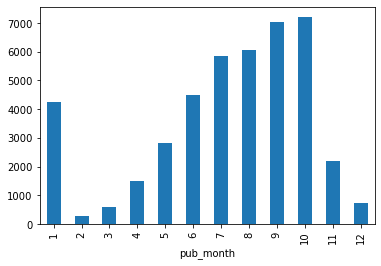

In [5]:
# Look at number of abstracts by month
df2.groupby('pub_month').size().plot(kind='bar');

It looks like the most studies were published between July to October, which makes sense given that this was at the height of the pandemic. Note that the studies published in December are likely ahead of print. Surprisingly, there are a lot of studies published in January of 2020. Let's look at these in more detail.

In [6]:
# Look at studies published in January of 2020
jan_df = df2[df2['pub_month'] == 1]
jan_df.head(10)

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state
53,33152043,"Pattern of COVID-19 in Sichuan province, China...","['Song H', 'Cao X', 'Ye H', 'He L', 'Li G', 'W...",PLoS One. 2020 Nov 5;15(11):e0241470. doi: 10....,"['School of Basic Medical Sciences, Chengdu Un...",2020,2020/11/06 06:00,United States,['eng'],This study described the epidemiology of 487 c...,2020-11-06 06:00:00,2020,11,2020-01-01,1,China,NaN
54,33152038,The Japanese version of the Fear of COVID-19 s...,"['Wakashima K', 'Asai K', 'Kobayashi D', 'Koiw...",PLoS One. 2020 Nov 5;15(11):e0241958. doi: 10....,"['Graduate School of Education, Tohoku Univers...",2020,2020/11/06 06:00,United States,['eng'],"COVID-19 is spreading worldwide, causing vario...",2020-11-06 06:00:00,2020,11,2020-01-01,1,Japan,NaN
55,33152034,Scientific quality of COVID-19 and SARS CoV-2 ...,"['Zdravkovic M', 'Berger-Estilita J', 'Zdravko...",PLoS One. 2020 Nov 5;15(11):e0241826. doi: 10....,"['Department of Anaesthesiology, Intensive Car...",2020,2020/11/06 06:00,United States,['eng'],BACKGROUND: A debate about the scientific qual...,2020-11-06 06:00:00,2020,11,2020-01-01,1,Switzerland,NaN
56,33152033,Information and communication technologies and...,"['Garcia Del Castillo-Rodriguez JA', 'Ramos-So...",PLoS One. 2020 Nov 5;15(11):e0241948. doi: 10....,"['Department of Health Psychology, Miguel Hern...",2020,2020/11/06 06:00,United States,['eng'],The mandatory home confinement of the Spanish ...,2020-11-06 06:00:00,2020,11,2020-01-01,1,Spain,NaN
57,33152030,Psychological consequences of COVID-19 home co...,"['Ammar A', 'Mueller P', 'Trabelsi K', 'Chtour...",PLoS One. 2020 Nov 5;15(11):e0240204. doi: 10....,"['Institute of Sport Science, Otto-von-Guerick...",2020,2020/11/06 06:00,United States,['eng'],BACKGROUND: Public health recommendations and ...,2020-11-06 06:00:00,2020,11,2020-01-01,1,Tunisia,NaN
58,33152019,"Variant analysis of 1,040 SARS-CoV-2 genomes.","['Rouchka EC', 'Chariker JH', 'Chung D']",PLoS One. 2020 Nov 5;15(11):e0241535. doi: 10....,['Department of Computer Science and Engineeri...,2020,2020/11/06 06:00,United States,['eng'],The severe acute respiratory syndrome-coronavi...,2020-11-06 06:00:00,2020,11,2020-01-01,1,United States,KY
59,33152009,Monitoring life expectancy levels during the C...,"['Trias-Llimos S', 'Riffe T', 'Bilal U']",PLoS One. 2020 Nov 5;15(11):e0241952. doi: 10....,"['Center for Demographic Studies, Bellaterra, ...",2020,2020/11/06 06:00,United States,['eng'],BACKGROUND: To provide an interpretable summar...,2020-11-06 06:00:00,2020,11,2020-01-01,1,United States,PA
60,33152008,Is older age associated with COVID-19 mortalit...,"['Ho FK', 'Petermann-Rocha F', 'Gray SR', 'Jan...",PLoS One. 2020 Nov 5;15(11):e0241824. doi: 10....,"['Institute of Health and Wellbeing, Universit...",2020,2020/11/06 06:00,United States,['eng'],INTRODUCTION: Older people have been reported ...,2020-11-06 06:00:00,2020,11,2020-01-01,1,United Kingdom,NaN
61,33152004,The impact of individual lifestyle and status ...,"['Gao C', 'Zhao Z', 'Li F', 'Liu JL', 'Xu H', ...",PLoS One. 2020 Nov 5;15(11):e0241540. doi: 10....,"['Department of Critical Care Medicine, Suzhou...",2020,2020/11/06 06:00,United States,['eng'],BACKGROUND: Coronavirus disease 2019 (COVID-19...,2020-11-06 06:00:00,2020,11,2020-01-01,1,China,NaN
62,33151999,Ocular surface manifestations of coronavirus d...,"['Aggarwal K', 'Agarwal A', 'Jaiswal N', 'Dahi...",PLoS One. 2020 Nov 5;15(11):e0241661. doi: 10....,"['Advanced Eye Centre, Department of Ophthalmo...",2020,2020/11/06 06:00,United States,['eng'],PURPOSE: This study was performed to determine...,2020-11-06 06:00:00,2020,11,2020-01-01,1,Singapore,NaN


It looks like for papers where the 'pub_date' column did not specify a month, it defaulted to January. I will correct this by checking for a discrepancy with the 'month' column (extracted from the Entrez/database date) and if present, replacing the value with the Entrez month.

In [7]:
# Indices for rows where 'pub_month' != 'month'
month_mask = jan_df['pub_month'] != jan_df['month']
wrong_month = [idx for idx, rows in jan_df[month_mask].iterrows()]
len(wrong_month)

4210

In [9]:
# Replace 'pub_month' with 'month' value
for idx in wrong_month:
    df2.loc[idx,'pub_month'] = df2.loc[idx,'month']

jan_df_2 = df2[df2['pub_month'] == 1]
jan_df_2[month_mask]

<ipython-input-9-af54f9c931f1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jan_df_2[month_mask]


,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state


In [112]:
# Save df
compression_opts = dict(method='zip', archive_name='abstracts_df_cleaned.csv')  
df2.to_csv(r'/Users/sunnajo/Desktop/abstracts_df_cleaned.zip', index=False, compression=compression_opts)

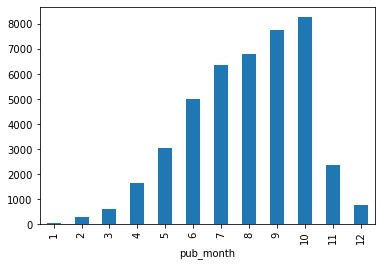

In [10]:
# Re-evaluate distribution by month
df2.groupby('pub_month').size().plot(kind='bar');

This looks more appropriate!

We also notice some studies published in December- these are likely ahead of print. Let's look at these abstracts.

In [12]:
df2[df2['pub_month'] == 12]

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state
106,33151135,"Viral RNA level, serum antibody responses, and...","['Yang C', 'Jiang M', 'Wang X', 'Tang X', 'Fan...",Emerg Microbes Infect. 2020 Dec;9(1):2368-2378...,"[""Shenzhen Center for Disease Control and Prev...",2020 Dec,2020/11/06 06:00,United States,['eng'],Managing recovered COVID-19 patients with recu...,2020-11-06 06:00:00,2020,11,2020-12-01,12,China,NaN
241,33148042,Understanding and Addressing Latinx COVID-19 D...,"['Baquero B', 'Gonzalez C', 'Ramirez M', 'Chav...",Health Educ Behav. 2020 Dec;47(6):845-849. doi...,"['University of Washington, Seattle, WA, USA.'...",2020 Dec,2020/11/06 06:00,United States,['eng'],"The COVID-19 pandemic has exposed, and intensi...",2020-11-06 06:00:00,2020,11,2020-12-01,12,United States,WA
283,33147321,An unconventional view of COVID-19 T cell immu...,"['Koay HF', 'Fulford TS', 'Godfrey DI']",J Exp Med. 2020 Dec 7;217(12). pii: 191207. do...,"['Department of Microbiology and Immunology, U...",2020 Dec 7,2020/11/05 06:00,United States,['eng'],"In this issue of JEM, Jouan et al. (https://do...",2020-11-05 06:00:00,2020,11,2020-12-07,12,Australia,NaN
556,33141599,Lessons learned while creating an effective em...,"['Vollbrecht PJ', 'Porter-Stransky KA', 'Lacke...",Adv Physiol Educ. 2020 Dec 1;44(4):722-725. do...,"['Department of Biomedical Sciences, Western M...",2020 Dec 1,2020/11/04 06:00,United States,['eng'],The COVID-19 pandemic is forcing many institut...,2020-11-04 06:00:00,2020,11,2020-12-01,12,United States,MD
720,33138931,"Substance use disorder treatment, parenting, a...","['Cioffi CC', 'Leve LD']",J Subst Abuse Treat. 2020 Dec;119:108148. doi:...,"['Prevention Science Institute, University of ...",2020 Dec,2020/11/04 06:00,United States,['eng'],"Prior to COVID-19, options for parenting suppo...",2020-11-04 06:00:00,2020,11,2020-12-01,12,United States,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42965,31905881,Feline Infectious Peritonitis Virus Nsp5 Inhib...,"['Chen S', 'Tian J', 'Li Z', 'Kang H', 'Zhang ...",Viruses. 2019 Dec 30;12(1). pii: v12010043. do...,['State Key Laboratory of Veterinary Biotechno...,2019 Dec 30,2020/01/08 06:00,Switzerland,['eng'],"Feline infectious peritonitis (FIP), caused by...",2020-01-08 06:00:00,2020,1,2019-12-30,12,China,NaN
42966,31905842,Investigation of the Role of the Spike Protein...,"['Kao CF', 'Chang HW']",Viruses. 2019 Dec 30;12(1). pii: v12010041. do...,"['School of Veterinary Medicine, National Taiw...",2019 Dec 30,2020/01/08 06:00,Switzerland,['eng'],Porcine epidemic diarrhea virus (PEDV) has con...,2020-01-08 06:00:00,2020,1,2019-12-30,12,Taiwan,NaN
42967,31905830,Porcine Epidemic Diarrhea Altered Colonic Micr...,"['Tan Z', 'Dong W', 'Ding Y', 'Ding X', 'Zhang...",Genes (Basel). 2019 Dec 30;11(1). pii: genes11...,"['Key Laboratory of Animal Genetics, Breeding ...",2019 Dec 30,2020/01/08 06:00,Switzerland,['eng'],Porcine epidemic diarrhea (PED) is a major gas...,2020-01-08 06:00:00,2020,1,2019-12-30,12,China,NaN
42975,31889228,Evaluation of a Bayesian penalized likelihood ...,"['Te Riet J', 'Rijnsdorp S', 'Roef MJ', 'Arend...",EJNMMI Phys. 2019 Dec 30;6(1):32. doi: 10.1186...,"['Department of Medical Physics, Catharina Hos...",2019 Dec 30,2020/01/01 06:00,Germany,['eng'],"BACKGROUND: Recently, a Bayesian penalized lik...",2020-01-01 06:00:00,2020,1,2019-12-30,12,Netherlands,NaN


I will leave these as they may indicate future trends in research.

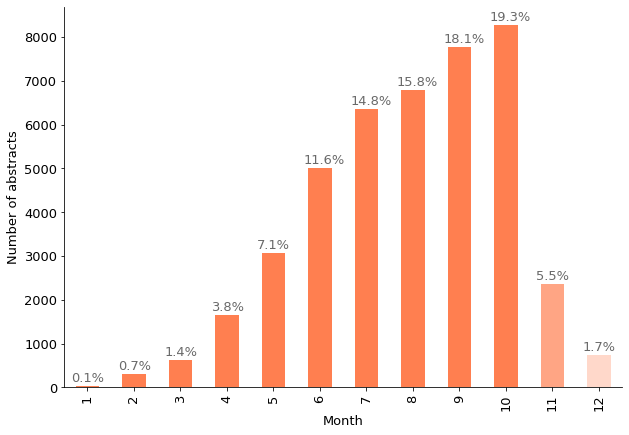

In [142]:
# Finalizing figure
# Code adapted from: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

ax = df2.groupby('pub_month').size().plot(kind='bar', color='coral', fontsize=13, figsize=(10,7))
ax.set_alpha(0.8)
# ax.set_title("Number of abstracts published by month", fontsize=16)
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Number of abstracts", fontsize=13);
# ax.set_yticks([0, 5, 10, 15, 20])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-0.1, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
            color='dimgrey')

ax.patches[-1].set_alpha(0.3)
ax.patches[-2].set_alpha(0.7)

plt.savefig('abstracts_months.svg', dpi=100, bbox_inches='tight')

In [149]:
# Excluding Nov & Dec
before_nov_df = df2[df2['pub_month'] < 11]
before_nov_df['pub_month'].value_counts()

10    8276
9     7773
8     6791
7     6364
6     5002
5     3057
4     1646
3      623
2      302
1       31
Name: pub_month, dtype: int64

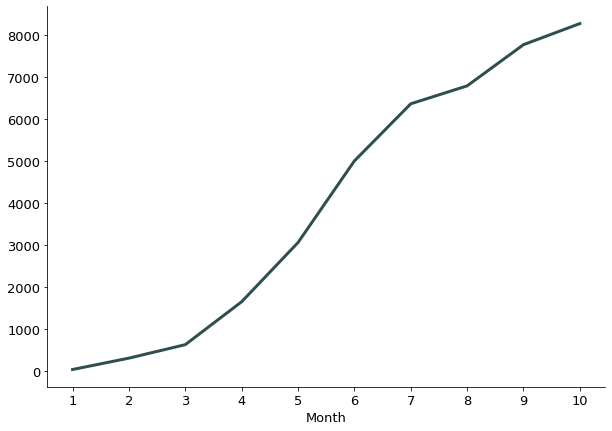

In [158]:
# Finalizing figure
# Code adapted from: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

ax = before_nov_df.groupby('pub_month').size().plot(kind='line', color='darkslategrey', linewidth=3, fontsize=13, figsize=(10,7))
ax.set_alpha(0.8)
# ax.set_title("Number of abstracts published by month", fontsize=16)
ax.set_xlabel("Month", fontsize=13)
ax.set_xticks(np.arange(1,11))
# ax.set_ylabel("Number of abstracts", fontsize=13);
ax.set_yticks(np.arange(0,9000,1000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.savefig('abstracts_months.svg', dpi=100, bbox_inches='tight')

### EDA: Location

I want to look at the distribution of the number of abstracts by country.

I will look at the distribution by country that the journal in which the abstract was published originates and by the country from which the study originated.

In [46]:
# Dataframe
journal_country_df = pd.DataFrame(df2.groupby('country').size())
journal_country_df.rename(columns={0: 'num_abstracts'}, inplace=True)
journal_country_df

,num_abstracts
country,
Argentina,33
Australia,447
Austria,78
Bangladesh,15
Belgium,8
...,...
Turkey,163
Uganda,26
United Arab Emirates,127


/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


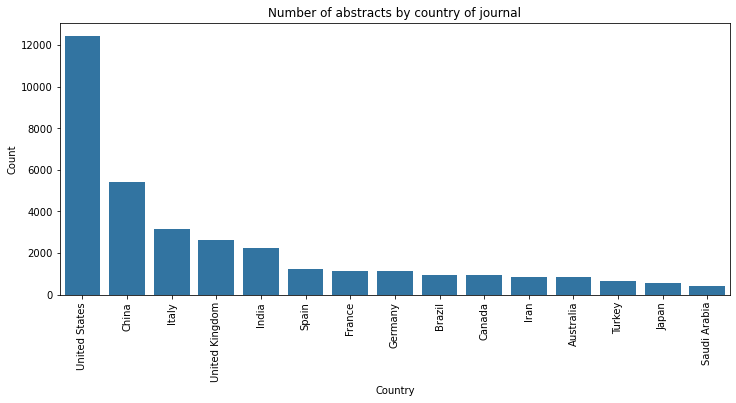

In [45]:
# Look at distribution of journal country (top 15)
data = journal_country_df.sort_values(by='num_abstracts', ascending=False).iloc[:15,:]
plt.figure(figsize=(12,5))
sns.barplot(data.index, data['num_abstracts'], color='tab:blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of abstracts by country of journal');

This will be better represented by a map. I will prepare the data to be able to create this visualization by adding coordinates to the dataframe.

In [47]:
# Read in .csv file containing country names and corresponding coordinates
countries_df = pd.read_csv('/Users/sunnajo/Desktop/countries.csv')
countries_df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [48]:
# Rename columns for merging
countries_df.drop(columns='country', inplace=True)
countries_df.rename(columns={'name': 'country'}, inplace=True)
countries_df = countries_df[['country', 'latitude', 'longitude']]
countries_df.head(1)

,country,latitude,longitude
0,Andorra,42.546245,1.601554


In [49]:
df3 = df2.merge(countries_df, on='country', how='left')
df3.head()

,pmid,title,authors,source,location,pub_date,entrez_date,country,language,abstract,entrez_date_dt,year,month,pub_date_dt,pub_month,pub_country,state,latitude,longitude
0,33152797,Rapid improvement of a critically ill obstetri...,"['Magallanes-Garza GI', 'Valdez-Alatorre C', '...",Int J Gynaecol Obstet. 2020 Nov 5. doi: 10.100...,"['Tecnologico de Monterrey, Escuela de Medicin...",2020 Nov 5,2020/11/06 06:00,United States,['eng'],SARS-CoV-2 (COVID-19) infection in pregnancy i...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Mexico,NaN,37.090240,-95.712891
1,33152773,[Travelling to High Altitude Destinations afte...,"['Grannemann JJ', 'Roper A']",Pneumologie. 2020 Nov 5. doi: 10.1055/a-1239-0...,"['Klinikum Bielefeld, Abteilung Anasthesiologi...",2020 Nov 5,2020/11/06 06:00,Germany,['ger'],After loosening of travel restrictions due to ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN,51.165691,10.451526
2,33152771,Coronavirus Pandemic - SARS-CoV-2 in Orthopedi...,"['Muller M', 'Stockle U', 'Trampuz A', 'Felix ...",Z Orthop Unfall. 2020 Nov 5. doi: 10.1055/a-12...,['Centrum fur Muskuloskeletale Chirurgie Chari...,2020 Nov 5,2020/11/06 06:00,Germany,"['eng', 'ger']",The corona virus has spread worldwide since it...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN,51.165691,10.451526
3,33152743,The COVID-19 Pandemic: An Unprecedented Traged...,['Storz MA'],Clin Exp Pediatr. 2020 Nov 5. pii: cep.2020.01...,"['Filder Hospital, Filderstadt, Baden-Wurttemb...",2020 Nov 5,2020/11/06 06:00,South Korea,['eng'],The childhood obesity pandemic has emerged as ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,Germany,NaN,35.907757,127.766922
4,33152729,Post-COVID-19 Epidemic: Allostatic Load among ...,"['Peng M', 'Wang L', 'Xue Q', 'Yin L', 'Zhu BH...",Psychother Psychosom. 2020 Nov 5:1-10. doi: 10...,['Division of Neuropsychiatry and Psychosomati...,2020 Nov 5,2020/11/06 06:00,Switzerland,['eng'],BACKGROUND: As the fight against the COVID-19 ...,2020-11-06 06:00:00,2020,11,2020-11-05,11,China,NaN,46.818188,8.227512


In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42977 entries, 0 to 42976
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pmid            42977 non-null  int64  
 1   title           42977 non-null  object 
 2   authors         42977 non-null  object 
 3   source          42977 non-null  object 
 4   location        42977 non-null  object 
 5   pub_date        42977 non-null  object 
 6   entrez_date     42977 non-null  object 
 7   country         42977 non-null  object 
 8   language        42977 non-null  object 
 9   abstract        42977 non-null  object 
 10  entrez_date_dt  42977 non-null  object 
 11  year            42977 non-null  int64  
 12  month           42977 non-null  int64  
 13  pub_date_dt     41576 non-null  object 
 14  pub_month       42977 non-null  int64  
 15  pub_country     42977 non-null  object 
 16  state           9671 non-null   object 
 17  latitude        42977 non-null 

In [51]:
country_ct_df = pd.DataFrame(df2.groupby('pub_country').size()).reset_index()
country_ct_df.rename(columns={0: 'num_abstracts'}, inplace=True)
country_ct_df.head()

,pub_country,num_abstracts
0,Afghanistan,2
1,Albania,2
2,Algeria,25
3,Andorra,1
4,Argentina,119


In [52]:
# To determine color scale, look at percentiles of distribution
ct_min = country_ct_df['num_abstracts'].min()
ct_max = country_ct_df['num_abstracts'].max()
ct_range = ct_max - ct_min
ct_25, ct_median, ct_75 = statistics.quantiles(country_ct_df['num_abstracts'])
ct_mean = statistics.mean(country_ct_df['num_abstracts'])

print('Minimum: ', ct_min)
print('Maximum: ', ct_max)
print('Range: ', ct_range)
print('Mean: ', ct_mean)
print('Median: ', ct_median)
print('25th percentile: ', ct_25)
print('75th percentile: ', ct_75)

Minimum:  1
Maximum:  12447
Range:  12446
Mean:  268.60625
Median:  18.5
25th percentile:  3.0
75th percentile:  117.25


In [54]:
# World map heat map of number of abstracts
# Code adapted from: ***
# Color palette from coolors.co
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = country_ct_df['pub_country'],
    z = country_ct_df['num_abstracts'],
    # text = country_ct_df['country'],
    colorscale = [
        [0, "rgb(119, 73, 54)"],
        [0.1, "rgb(119, 73, 54)"],

        [0.1, "rgb(138, 90, 68)"],
        [0.2, "rgb(138, 90, 68)"],

        [0.2, "rgb(157, 107, 83)"],
        [0.3, "rgb(157, 107, 83)"],

        [0.3, "rgb(176, 125, 98)"],
        [0.4, "rgb(176, 125, 98)"],

        [0.4, "rgb(195, 142, 112)"],
        [0.5, "rgb(195, 142, 112)"],

        [0.5, "rgb(205, 151, 119)"],
        [0.6, "rgb(205, 151, 119)"],

        [0.6, "rgb(214, 159, 126)"],
        [0.7, "rgb(214, 159, 126)"],

        [0.7, "rgb(222, 171, 144)"],
        [0.8, "rgb(222, 171, 144)"],

        [0.8, "rgb(230, 184, 162)"],
        [0.9, "rgb(230, 184, 162)"],

        [0.9, "rgb(237, 196, 179)"],
        [1.0, "rgb(237, 196, 179)"]
    ],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of abstracts',
))

fig.update_layout(
    title_text='Number of COVID-19 Related Abstracts by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_html('abstracts_countries.html', auto_open=True)

Look at the distribution by country where study originated.

In [64]:
# country_ct_df['pct'] = country_ct_df['num_abstracts']/country_ct_df['num_abstracts'].sum()*100
country_ct_df.sort_values(by='pct', ascending=False).head(10)

,pub_country,num_abstracts,pct
153,United States,12447,28.962003
28,China,5423,12.618377
70,Italy,3159,7.350443
152,United Kingdom,2604,6.059055
64,India,2258,5.253973
137,Spain,1244,2.894572
47,France,1134,2.638621
51,Germany,1128,2.624660
20,Brazil,961,2.236080
26,Canada,927,2.156968


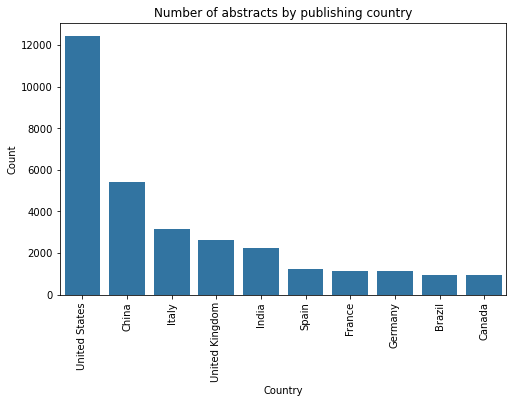

In [57]:
# Top 10
data = country_ct_df.sort_values(by='num_abstracts', ascending=False).iloc[:10,:]
plt.figure(figsize=(8,5))
sns.barplot(x='pub_country', y='num_abstracts', data=data, color='tab:blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of abstracts by publishing country');

In [688]:
# World map heat map of number of abstracts
# Code adapted from: ***
# Color palette from coolors.co

fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = pub_country_ct_df['pub_country'],
    z = pub_country_ct_df['num_abstracts'],
    # text = country_ct_df['country'],
    colorscale = [
        [0, "rgb(119, 73, 54)"],
        [0.1, "rgb(119, 73, 54)"],

        [0.1, "rgb(138, 90, 68)"],
        [0.2, "rgb(138, 90, 68)"],

        [0.2, "rgb(157, 107, 83)"],
        [0.3, "rgb(157, 107, 83)"],

        [0.3, "rgb(176, 125, 98)"],
        [0.4, "rgb(176, 125, 98)"],

        [0.4, "rgb(195, 142, 112)"],
        [0.5, "rgb(195, 142, 112)"],

        [0.5, "rgb(205, 151, 119)"],
        [0.6, "rgb(205, 151, 119)"],

        [0.6, "rgb(214, 159, 126)"],
        [0.7, "rgb(214, 159, 126)"],

        [0.7, "rgb(222, 171, 144)"],
        [0.8, "rgb(222, 171, 144)"],

        [0.8, "rgb(230, 184, 162)"],
        [0.9, "rgb(230, 184, 162)"],

        [0.9, "rgb(237, 196, 179)"],
        [1.0, "rgb(237, 196, 179)"]
    ],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of abstracts',
))

fig.update_layout(
    title_text='Number of COVID-19 Related Abstracts by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_html('abstracts_world_map.html', auto_open=True)

In [690]:
# Bubble map
import plotly.express as px

fig = px.scatter_geo(pub_country_ct_df, locationmode="country names", locations="pub_country", size="num_abstracts",
                     hover_name="pub_country", color="pub_country",
                     projection="natural earth")

fig.update_layout(
    title_text='Number of COVID-19 Related Abstracts by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_html('abstracts_world_map_bubble.html', auto_open=True)

In [37]:
# Plot of countries' research productivity
nature_index = pd.read_csv('/Users/sunnajo/Downloads/export.csv')
nature_index.drop(columns='FC', inplace=True)
nature_index = nature_index.sort_values(by='AC', ascending=False)
nature_index.head(20)

,Country,AC
0,United States of America (USA),29048
1,China,19450
2,Germany,9131
3,United Kingdom (UK),8025
4,Japan,5205
5,France,5051
6,Canada,3524
8,Switzerland,3240
9,Australia,3120
10,Spain,2882


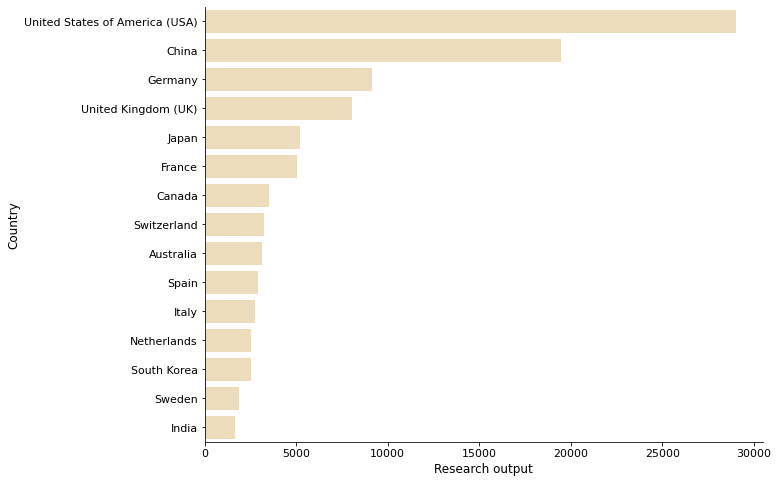

In [54]:
plt.figure(figsize=((10,8)))
ax = sns.barplot(x='AC', y='Country', data=nature_index.iloc[:15], color='wheat')
ax.set_xlabel("Research output", fontsize=12)
ax.set_ylabel("Country", fontsize=12);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.savefig('nature_index.svg', dpi=100, bbox_inches='tight');

In [5]:
# Look at countries over time
month_country_df = pd.DataFrame(df2.groupby(['pub_month', 'pub_country']).size())
month_country_df.rename(columns={0: 'num_abstracts'}, inplace=True)
month_country_df

num_abstracts
pub_month pub_country                        
1         Canada                            2
          China                             9
          Germany                           2
          Hong Kong                         3
          Japan                             2
...                                       ...
12        United Arab Emirates              2
          United Kingdom                   35
          United States                   162
          Vietnam                           5
          Yemen                             1

[1004 rows x 1 columns]

In [6]:
month_country_df2 = month_country_df.reset_index()

In [205]:
unstacked_mc_df = month_country_df.unstack(level=1)
unstacked_mc_df.fillna(0, inplace=True)
unstacked_mc_df

num_abstracts                                                    \
pub_country   Afghanistan Albania Algeria Andorra Argentina Aruba Australia   
pub_month                                                                     
1                     0.0     0.0     0.0     0.0       0.0   0.0       0.0   
2                     0.0     0.0     0.0     0.0       0.0   0.0       4.0   
3                     0.0     0.0     0.0     0.0       1.0   0.0       8.0   
4                     0.0     0.0     1.0     0.0       3.0   0.0      32.0   
5                     0.0     0.0     2.0     0.0      11.0   1.0      47.0   
6                     0.0     0.0     1.0     0.0       7.0   0.0      88.0   
7                     0.0     0.0     4.0     0.0      28.0   0.0      95.0   
8                     0.0     1.0     3.0     0.0      17.0   0.0     144.0   
9                     1.0     0.0     5.0     0.0      18.0   0.0     163.0   
10                    1.0     0.0     6.0     1.0      25.0   0.0     166.0   
11                    0.0     1.0     1.0     0.0       6.0   0.0      55.0   
12                    0.0     0.0     2.0     0.0       3.0   0.0      19.0   

                                        ...                               \
pub_country Austria Azerbaijan Bahrain  ... Ukraine United Arab Emirates   
pub_month                               ...                                
1               0.0        0.0     0.0  ...     0.0                  0.0   
2               0.0        0.0     0.0  ...     0.0                  0.0   
3               0.0        0.0     0.0  ...     0.0                  1.0   
4               3.0        0.0     0.0  ...     1.0                  2.0   
5               9.0        0.0     1.0  ...     0.0                  6.0   
6              18.0        0.0     1.0  ...     0.0                  5.0   
7              18.0        0.0     3.0  ...     1.0                  8.0   
8              27.0        1.0     5.0  ...     0.0                 12.0   
9              43.0        0.0     4.0  ...     1.0                 20.0   
10             37.0        0.0     0.0  ...     4.0                 27.0   
11             10.0        0.0     0.0  ...     0.0                  4.0   
12              2.0        0.0     0.0  ...     0.0                  2.0   

                                                                          \
pub_country United Kingdom United States Uruguay Venezuela Vietnam Yemen   
pub_month                                                                  
1                      1.0           4.0     0.0       0.0     0.0   0.0   
2                     23.0          54.0     0.0       0.0     0.0   0.0   
3                     35.0         155.0     0.0       2.0     1.0   0.0   
4                     82.0         402.0     0.0       2.0     2.0   0.0   
5                    155.0         891.0     1.0       2.0     4.0   1.0   
6                    271.0        1372.0     0.0       3.0    17.0   0.0   
7                    369.0        1950.0     3.0       6.0     3.0   1.0   
8                    439.0        2033.0     1.0       7.0     5.0   0.0   
9                    505.0        2275.0     1.0       2.0     9.0   0.0   
10                   545.0        2412.0     2.0       7.0     9.0   2.0   
11                   144.0         737.0     0.0       5.0     2.0   0.0   
12                    35.0         162.0     0.0       0.0     5.0   1.0   

                             
pub_country Zambia Zimbabwe  
pub_month                    
1              0.0      0.0  
2              0.0      0.0  
3              0.0      0.0  
4              0.0      0.0  
5              1.0      1.0  
6              1.0      2.0  
7              1.0      2.0  
8              0.0      8.0  
9              0.0      2.0  
10             2.0      1.0  
11             0.0      0.0  
12             0.0      0.0  

[12 rows x 160 columns]

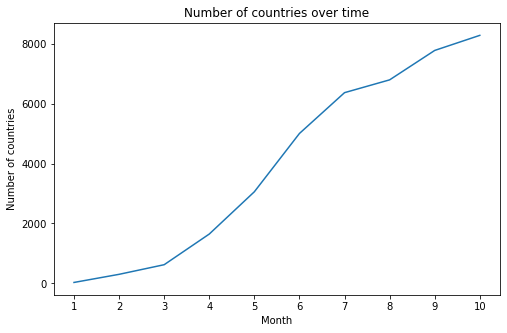

In [169]:
# Create dictionary with month as key and # of countries as value
month_country_cts = {}
for i in range(10):
    month_country_cts[i+1] = unstacked_mc_df.iloc[i].sum()

# Plot
plt.figure(figsize=(8,5))
plt.plot(month_country_cts.keys(), month_country_cts.values())
plt.title('Number of countries over time')
plt.xlabel('Month')
plt.xticks(range(1,11))
plt.ylabel('Number of countries');

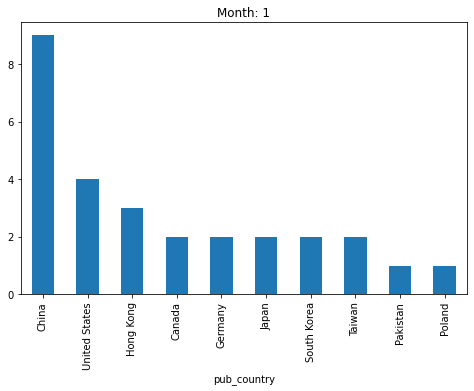

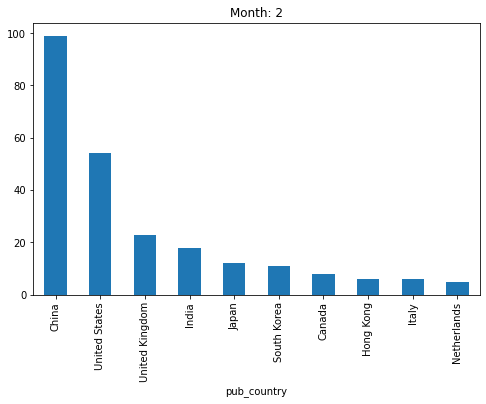

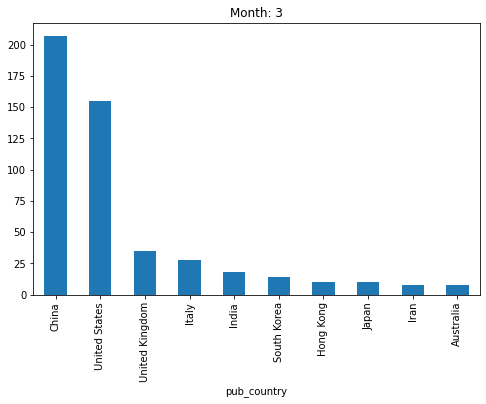

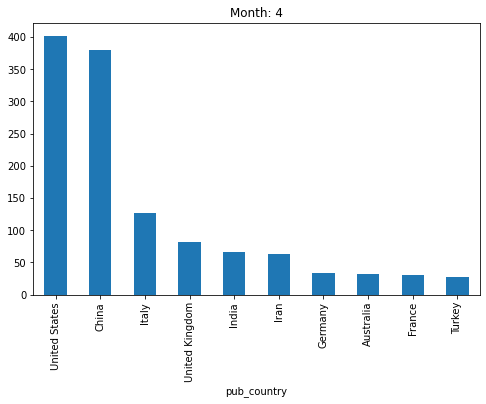

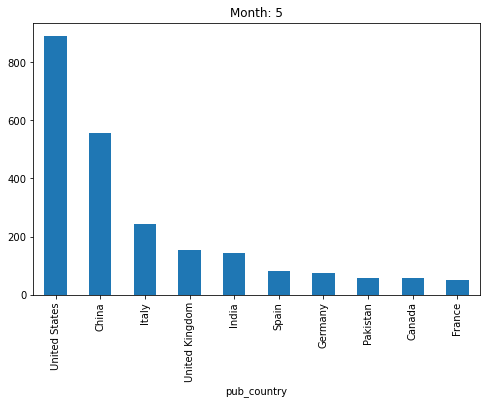

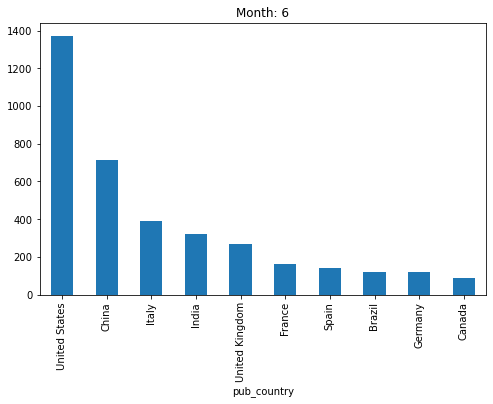

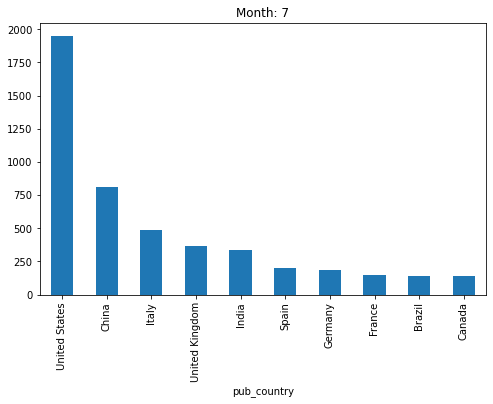

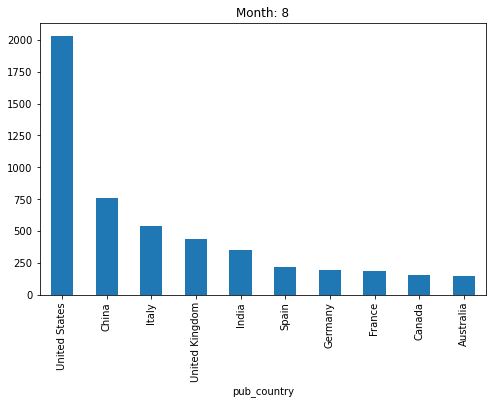

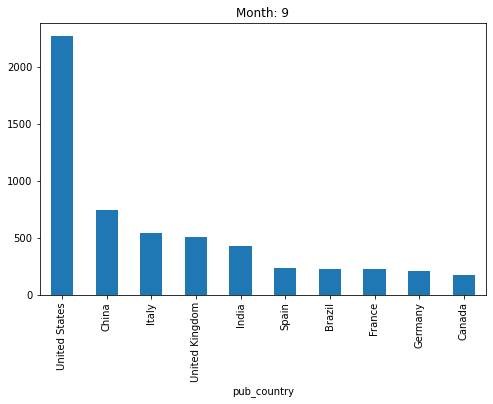

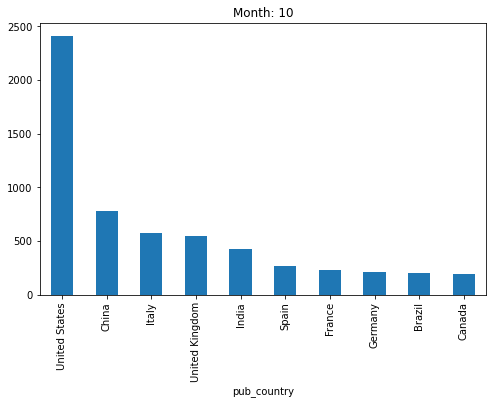

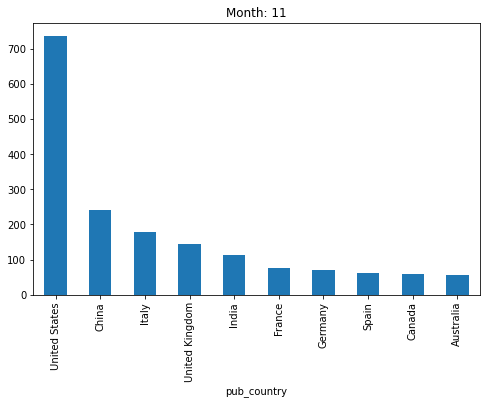

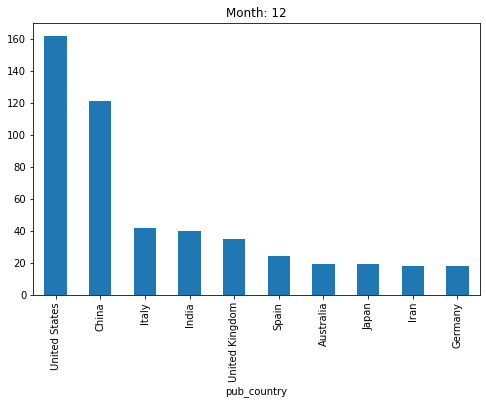

In [55]:
# Function for plotting distribution of countries (top 10) by month
def plot_month_country(df, i):
    df.xs(i).sort_values(by='num_abstracts', ascending=False).iloc[:10].\
    plot(kind='bar', title='Month: {}'.format(i), legend=None, figsize=(8,5))
    plt.show()
    
for i in range(1,13):
    plot_month_country(month_country_df, i)

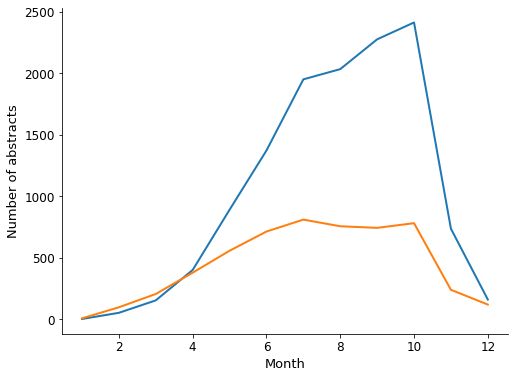

In [171]:
# Look at U.S. & China
us_month_cts = pd.DataFrame(month_country_df.unstack(level=1).loc[:,('num_abstracts',        'United States')])
china_month_cts = pd.DataFrame(month_country_df.unstack(level=1).loc[:,('num_abstracts',        'China')])
ax = us_month_cts.merge(china_month_cts, on='pub_month').plot(kind='line', figsize=(8,6), legend=None, linewidth=2)
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Number of abstracts", fontsize=13);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [1]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [9]:
month_country_df2

,pub_month,pub_country,num_abstracts
0,1,Canada,2
1,1,China,9
2,1,Germany,2
3,1,Hong Kong,3
4,1,Japan,2
...,...,...,...
999,12,United Arab Emirates,2
1000,12,United Kingdom,35
1001,12,United States,162
1002,12,Vietnam,5


In [ ]:
# Interactive map (slider)
df = month_country_df2

data_slider = []
for month in df['pub_month'].unique():

    df_month = df[df['pub_month'] == month]

    for col in df_month.columns:
        df_month[col] = df_month[col].astype(str)

    data_one_month = dict(
                        type='choropleth',
                        locations = df['pub_country'],
                        z=df_month['num_abstracts'],
                        text = df['pub_country'],
                        locationmode='country names',
            colorscale = [
        [0, "rgb(119, 73, 54)"],
        [0.1, "rgb(119, 73, 54)"],

        [0.1, "rgb(138, 90, 68)"],
        [0.2, "rgb(138, 90, 68)"],

        [0.2, "rgb(157, 107, 83)"],
        [0.3, "rgb(157, 107, 83)"],

        [0.3, "rgb(176, 125, 98)"],
        [0.4, "rgb(176, 125, 98)"],

        [0.4, "rgb(195, 142, 112)"],
        [0.5, "rgb(195, 142, 112)"],

        [0.5, "rgb(205, 151, 119)"],
        [0.6, "rgb(205, 151, 119)"],

        [0.6, "rgb(214, 159, 126)"],
        [0.7, "rgb(214, 159, 126)"],

        [0.7, "rgb(222, 171, 144)"],
        [0.8, "rgb(222, 171, 144)"],

        [0.8, "rgb(230, 184, 162)"],
        [0.9, "rgb(230, 184, 162)"],

        [0.9, "rgb(237, 196, 179)"],
        [1.0, "rgb(237, 196, 179)"]
    ],
    autocolorscale=False,
    reversescale=True,
    # marker_line_color='darkgray',
    # marker_line_width=0.5,
    colorbar_title = 'Number of abstracts'
                        )

    data_slider.append(data_one_month)
    
# Build slider object
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Month {}'.format(i + 1))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

# Set up layout
layout = dict(geo=dict(scope='world',
                       showframe=False,
                       showcoastlines=False,
                       showcountries=True,
                       projection={'type': 'equirectangular'}),
                        sliders=sliders)

fig = dict(data=data_slider, layout=layout)
plotly.offline.plot(fig, show_link = True)f